<a href="https://colab.research.google.com/github/safranco8/Mentoria2022-G2/blob/main/TP3_aprendizaje_supervisado_(modif).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Predicción de Ventas en las Sucursales de una Cadena de Supermercados





# Trabajo Práctico N°3: Aprendizaje Supervisado

## Introducción

En los prácticos 1 y 2 se analizaron las series originales y se les realizaron diversas transformaciones. 
A partir de las series preprocesadas, en este práctico se persigue el objetivo general de entrenar  modelos predictivos y comparar su desempeño. 

En esta introducción se describen muy brevemente algunas metodologías propias de series temporales que serán necesarias para responder las consignas. La idea es solo introducirnos en lo mínimo necesario para adaptar lo visto en _Introducción al Aprendizaje Automático_ y _Aprendizaje Supervisado_ al caso de Series Temporales. Se proveen varios links al blog: [machinelearningmastery.com](https://machinelearningmastery.com/) de Jason Brownlee, porque contiene explicaciones muy claras y bastante código de Python que seguramente les será muy útil.

### División en conjuntos de entrenamiento y test

Como se estudia en la materia _Introducción al Aprendizaje Automático_, para entrenar modelos y seleccionar cuál es el más adecuado, se debe __particionar los datos (ejemplos) en conjuntos de entrenamiento, validación y test__; o bien en conjuntos de entrenamiento y test, si se emplea validación cruzada. La práctica habitual para construir dichos subconjuntos, es por medio de selección aleatoria, a fines de garantizar que los mismos provengan de una misma distribución y a su vez evitar el sobreajuste. En el caso de datos de series temporales, dicha estrategia no resulta adecuada porque un muestreo aleatorio rompe el ordenamiento de los datos por lo que se pierde la autocorrelación que justamente es lo que le dá sentido al análisis. Por lo tanto, para dividir los conjuntos de entrenamiento y test se debe acudir a otras metodologías. 

Existen dos procedimientos de partición que son los más empleados para datos de series de tiempo. La forma más secilla consiste en particionar el dataset en un punto fijo del tiempo de modo tal que los datos mas antiguos se usan para entrenar los modelos y los mas nuevos para test([Train-Test Split](https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/)). Otro procedimiento, denominado en el mismo blog como [Walk-Forward Validation](https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/), consiste en realizar cortes recursivos, por ejemplo a partir de una ventana temporal inicial tomar los $s$ primeros datos para pronosticar el valor de la variable en $s+1$, luego tomar los $s+1$ primeros datos para estimar el valor en $s+2$, etc (debe notarse que el conjunto que se usa para entrenamiento crece en cada paso). Existe también una variación del segundo procedimiento en la que se mantiene fijo el tamaño del conjunto de entrenamiento, por ejemplo se usan los primeros $s$ datos para pronosticar el valor en $s+1$ como antes, pero en el siguiente paso se dropea la primera observación y se emplean los datos desde la observación 2 hasta la $s+1$ para pronosticar el valor en $s+2$ (entonces en cada paso el conjunto de entrenamiento esá formado por $s$ datos). 

### Entrenamiento de modelos

Exploraremos algunos modelos propios de la literatura estadística pero empleando una metodología de entrenamiento mas ligada a aprendizaje automático.
En la literatura estadística de Series Temporales se trabaja tanto con estimaciones puntuales (el pronóstico es un único número) como en la construcción de bandas de pronóstico (un rango entre los que se espera que esté el valor pronosticado con cierta probabilidad) y en la selección automática de los modelos se suelen emplear "criterios de información" tales como el de Akaike, Schwarz, Hannan-Quiin. En cambio, en aprendizaje automático por lo general solo se busca efectuar una estimación puntual y para la selección de modelos (tuneo de hiperparámetros), se usan métricas predictivas. 

##### Modelos base

Una vez particionados los datos, por lo general es una buena idea estimar algunos modelos muy sencillos que sirven de referencia. Los modelos base mas sencillos son los de Average Forecast y Naive Forecast.

El [Average Forecast](https://otexts.com/fpp2/simple-methods.html) consiste en simplemente construir los pronosticos de los valores futuros usando el promedio de los valores observados.

Por su parte, el [Naive Forecast](https://machinelearningmastery.com/persistence-time-series-forecasting-with-python/) emplea como predicción el último valor observado.

##### Modelos ARIMA y SARIMA

###### Modelos ARIMA

Los modelos [Autorregresivos Integrados de Medias Móviles](https://otexts.com/fpp2/non-seasonal-arima.html) (ARIMA) emplean la autocorrelación de las series para mejorar los pronósticos.  Por lo general se representan como $ARIMA(p, d, q)$, donde $p$ indica la cantidad de retardos de la series que se incluyen, $d$ es la cantidad de veces que hay que diferenciar la serie para lograr su estacionariedad y $q$ es la cantidad de retardos del término de perturbación que se incluye, o sea, si $y'$ es la serie diferenciada $d$ veces, el modelo que se entrena es:

$$y_t^{'} = c + \phi_1 y_{t-1}^{'} +...+\phi_q y_{t-q}^{'}  + \theta_1 \varepsilon_{t-1}+...+ \theta_1\varepsilon_{t-q} + \varepsilon_{t}$$

Es útil tener en cuenta que los __modelos "baseline"__ Average Forecast y Naive Forecast son de tipo ARIMA(0,0,0) y ARIMA(0,1,0); respectivamente.

###### Modelos SARIMA

Los modelos [Autorregresivos Integrados de Medias Móviles Estacionales](https://online.stat.psu.edu/stat510/lesson/4/4.1) (SARIMA) generalizan a los modelos ARIMA incluyendo también el modelado de la estacionalidad. Para ellos agregan retardos estacionales y diferencias estacionales. Por ejemplo, en el caso de series diarias es $y_{t-7}$, o sea el valor que tenía la serie en el mismo día de semana en la semana pasada. Estos modelos pueden ser muy relevantes para las series bajo estudio.

#### LSTM

Las redes Long Short Term Memory son un caso particular de las Redes Neuronales Recurrentes y buscan reolver el problema del decaimiento del gradiente. Por lo general las referencias son bastante confusas, pero estos enlaces son relativamente claros: [Link1](http://colah.github.io/posts/2015-08-Understanding-LSTMs/) - [Link2](https://filosofiaamino.wordpress.com/2019/06/26/introduccion-al-deep-learning-parte-3-redes-neuronales-recurrentes/).

#### Otros modelos

Hay muchas otras aternativas como Prophet, regresiones basadas en árboles, suavizado exponencial, etc.

### Métricas

En scikit learn están implementadas algunas métricas útiles para problemas de regresión habitualmente usadas en series temporales, tales como como el [Error Cuadrático Medio](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error), el [Error Absoluto Medio](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error) y el [Error Absoluto Mediano](https://scikit-learn.org/stable/modules/model_evaluation.html#median-absolute-error).


### Librerías

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

from itertools import product 

In [105]:

import warnings                                  # do not disturbe mode
warnings.filterwarnings('ignore')

# Load packages
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

# Importing everything from forecasting quality metrics
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error



In [4]:
!pip install pmdarima
import pmdarima as pm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Funciones**

In [5]:
def figura(datos, titulo, y):
    fig, ax = plt.subplots(figsize=(10,5), linewidth=2)
    ax = datos.plot(ax=ax, legend='Inline label')
    ax.set(title=titulo, xlabel="  ", ylabel=y)
    return fig

In [6]:
# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))

In [7]:
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]

In [8]:
# MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

## Carga del dataset

In [9]:
url = "https://www.dropbox.com/s/bbt21ors7tms6bn/train.csv?dl=1"
df = pd.read_csv(url)

In [10]:
df.drop(['id','onpromotion'], axis = 1, inplace = True)
df  = df.groupby(by=['store_nbr','date']).sum().unstack(0)
df = df['sales']
df=df.add_prefix('Store ')

In [11]:
df

store_nbr        Store 1       Store 2       Store 3       Store 4  \
date                                                                 
2013-01-01      0.000000      0.000000      0.000000      0.000000   
2013-01-02   7417.148000  10266.718981  24060.348000  10200.083980   
2013-01-03   5873.244001   7612.540000  18570.745025   7400.245000   
2013-01-04   5919.879001   7526.377000  17392.097995   6902.050001   
2013-01-05   6318.785010   9539.566000  22700.872005   9948.383000   
...                  ...           ...           ...           ...   
2017-08-11   5403.742021  13081.771001  32885.759996  10819.543000   
2017-08-12   7543.623000  12382.416000  31903.476000  10622.300000   
2017-08-13   3902.782000  13766.822095  34845.119300  13065.903000   
2017-08-14  10433.314000  12211.461020  32843.704026  10911.890000   
2017-08-15   9823.551018  11196.260002  30185.602000   9709.086000   

store_nbr        Store 5       Store 6       Store 7      Store 8  \
date                                                                
2013-01-01      0.000000      0.000000      0.000000      0.00000   
2013-01-02  10598.619020  13520.485002  11997.502000  14659.32800   
2013-01-03   7770.968000   9929.393000   9277.958000  10781.24300   
2013-01-04   7347.641991   8869.211980   8096.573018  11124.65100   
2013-01-05   8192.598000  12431.689040   8610.605999  14277.69902   
...                  ...           ...           ...          ...   
2017-08-11   9510.871000  15775.922000  15090.052970  18440.07100   
2017-08-12   8157.070000  14502.508000  14668.772022  19548.54801   
2017-08-13  10044.821000  19261.918980  14871.927000  21646.66000   
2017-08-14   9011.574900  14206.605030  19957.600000  19140.13700   
2017-08-15   8703.693000  13849.208995  18744.295980  17723.87600   

store_nbr        Store 9    Store 10  ...      Store 45     Store 46  \
date                                  ...                              
2013-01-01      0.000000     0.00000  ...      0.000000      0.00000   
2013-01-02  15867.484000  5430.08800  ...  27612.050950  27149.92000   
2013-01-03  10431.719000  4549.52998  ...  17377.980970  15751.35500   
2013-01-04   8085.159000  3381.01600  ...  19936.195040  17073.06408   
2013-01-05  13057.110000  5409.78501  ...  27104.223034  27231.19803   
...                  ...         ...  ...           ...          ...   
2017-08-11  15569.746000  5932.17900  ...  42991.258000  32020.67400   
2017-08-12  16901.506991  6322.80800  ...  38285.203104  28639.05300   
2017-08-13  18128.805000  6773.54200  ...  46029.399000  32935.39800   
2017-08-14  15978.709000  6236.74100  ...  35065.714000  23917.60600   
2017-08-15  18636.477000  6806.59200  ...  31562.926000  22348.41497   

store_nbr       Store 47      Store 48      Store 49      Store 50  \
date                                                                 
2013-01-01      0.000000      0.000000      0.000000      0.000000   
2013-01-02  27263.111010  19700.000000  16281.845000  16576.132000   
2013-01-03  18340.205000  14350.784030   9909.082000  11066.465040   
2013-01-04  18982.008970  15276.803001  10284.566000  12147.440000   
2013-01-05  26996.263995  22876.474000  13506.025000  17930.364000   
...                  ...           ...           ...           ...   
2017-08-11  38072.657020  26365.391000  32977.570000  21339.243004   
2017-08-12  34385.410000  24749.852000  30722.046040  19413.958001   
2017-08-13  38953.744000  29164.995000  32984.485000  21221.233000   
2017-08-14  31814.268000  20146.347000  31229.006000  18468.114000   
2017-08-15  31653.691000  17695.050000  28429.226003  16879.121004   

store_nbr       Store 51   Store 52     Store 53      Store 54  
date                                                            
2013-01-01      0.000000      0.000      0.00000      0.000000  
2013-01-02  15134.490990      0.000      0.00000   4973.285000  
2013-01-03  11170.057015      0.000      0.00000   3901.570000  
2013-01-04  12452.

Guardado del dataset

In [12]:
file_name = 'dataset.xlsx'
df.to_excel(file_name)

Lectura

In [13]:
df = pd.read_excel('dataset.xlsx',index_col=0 ,parse_dates=True)

In [14]:
df

Store 1       Store 2       Store 3       Store 4  \
date                                                                 
2013-01-01      0.000000      0.000000      0.000000      0.000000   
2013-01-02   7417.148000  10266.718981  24060.348000  10200.083980   
2013-01-03   5873.244001   7612.540000  18570.745025   7400.245000   
2013-01-04   5919.879001   7526.377000  17392.097995   6902.050001   
2013-01-05   6318.785010   9539.566000  22700.872005   9948.383000   
...                  ...           ...           ...           ...   
2017-08-11   5403.742021  13081.771001  32885.759996  10819.543000   
2017-08-12   7543.623000  12382.416000  31903.476000  10622.300000   
2017-08-13   3902.782000  13766.822095  34845.119300  13065.903000   
2017-08-14  10433.314000  12211.461020  32843.704026  10911.890000   
2017-08-15   9823.551018  11196.260002  30185.602000   9709.086000   

                 Store 5       Store 6       Store 7      Store 8  \
date                                                                
2013-01-01      0.000000      0.000000      0.000000      0.00000   
2013-01-02  10598.619020  13520.485002  11997.502000  14659.32800   
2013-01-03   7770.968000   9929.393000   9277.958000  10781.24300   
2013-01-04   7347.641991   8869.211980   8096.573018  11124.65100   
2013-01-05   8192.598000  12431.689040   8610.605999  14277.69902   
...                  ...           ...           ...          ...   
2017-08-11   9510.871000  15775.922000  15090.052970  18440.07100   
2017-08-12   8157.070000  14502.508000  14668.772022  19548.54801   
2017-08-13  10044.821000  19261.918980  14871.927000  21646.66000   
2017-08-14   9011.574900  14206.605030  19957.600000  19140.13700   
2017-08-15   8703.693000  13849.208995  18744.295980  17723.87600   

                 Store 9    Store 10  ...      Store 45     Store 46  \
date                                  ...                              
2013-01-01      0.000000     0.00000  ...      0.000000      0.00000   
2013-01-02  15867.484000  5430.08800  ...  27612.050950  27149.92000   
2013-01-03  10431.719000  4549.52998  ...  17377.980970  15751.35500   
2013-01-04   8085.159000  3381.01600  ...  19936.195040  17073.06408   
2013-01-05  13057.110000  5409.78501  ...  27104.223034  27231.19803   
...                  ...         ...  ...           ...          ...   
2017-08-11  15569.746000  5932.17900  ...  42991.258000  32020.67400   
2017-08-12  16901.506991  6322.80800  ...  38285.203104  28639.05300   
2017-08-13  18128.805000  6773.54200  ...  46029.399000  32935.39800   
2017-08-14  15978.709000  6236.74100  ...  35065.714000  23917.60600   
2017-08-15  18636.477000  6806.59200  ...  31562.926000  22348.41497   

                Store 47      Store 48      Store 49      Store 50  \
date                                                                 
2013-01-01      0.000000      0.000000      0.000000      0.000000   
2013-01-02  27263.111010  19700.000000  16281.845000  16576.132000   
2013-01-03  18340.205000  14350.784030   9909.082000  11066.465040   
2013-01-04  18982.008970  15276.803001  10284.566000  12147.440000   
2013-01-05  26996.263995  22876.474000  13506.025000  17930.364000   
...                  ...           ...           ...           ...   
2017-08-11  38072.657020  26365.391000  32977.570000  21339.243004   
2017-08-12  34385.410000  24749.852000  30722.046040  19413.958001   
2017-08-13  38953.744000  29164.995000  32984.485000  21221.233000   
2017-08-14  31814.268000  20146.347000  31229.006000  18468.114000   
2017-08-15  31653.691000  17695.050000  28429.226003  16879.121004   

                Store 51   Store 52     Store 53      Store 54  
date                                                            
2013-01-01      0.000000      0.000      0.00000      0.000000  
2013-01-02  15134.490990      0.000      0.00000   4973.285000  
2013-01-03  11170.057015      0.000      0.00000   3901.570000  
2013-01-04  12452.326000      0.000

**Importamos nuestros Dataset trabajados.
Resultantes de los TP1 y TP2 anteriores:**

In [15]:
url1 = "https://raw.githubusercontent.com/safranco8/Mentoria2022-G2/main/df_filtered.csv"
df_filtered = pd.read_csv(url1, index_col=0 ,parse_dates=True)
df_filtered

Store 34      Store 41      Store 44      Store 45  \
date                                                                 
2013-01-01   7749.693000   5205.833000  30095.181000  27612.050950   
2013-01-02   7749.693000   5205.833000  30095.181000  27612.050950   
2013-01-03   6246.722000   3699.117000  20447.057000  17377.980970   
2013-01-04   6100.120001   3581.132004  22795.799000  19936.195040   
2013-01-05   7189.406004   4694.560000  31382.508000  27104.223034   
...                  ...           ...           ...           ...   
2017-08-11  11758.411000  13424.267000  43330.500000  42991.258000   
2017-08-12  10082.835000  12168.491000  41559.973000  38285.203104   
2017-08-13  11235.408000  14243.813004  45604.445000  46029.399000   
2017-08-14  11752.063000  10077.156000  35617.528004  35065.714000   
2017-08-15  11321.420996   9397.724000  33141.322000  31562.926000   

               Store 46     Store 40      Store 47      Store 48  \
date                                                               
2013-01-01  27149.92000   4965.01400  27263.111010  19700.000000   
2013-01-02  27149.92000   4965.01400  27263.111010  19700.000000   
2013-01-03  15751.35500   4484.82800  18340.205000  14350.784030   
2013-01-04  17073.06408   3838.02700  18982.008970  15276.803001   
2013-01-05  27231.19803   5314.72700  26996.263995  22876.474000   
...                 ...          ...           ...           ...   
2017-08-11  32020.67400  17054.24800  38072.657020  26365.391000   
2017-08-12  28639.05300  21636.74300  34385.410000  24749.852000   
2017-08-13  32935.39800  14076.08800  38953.744000  29164.995000   
2017-08-14  23917.60600  18461.44001  31814.268000  20146.347000   
2017-08-15  22348.41497  19552.93500  31653.691000  17695.050000   

                Store 39      Store 38  ...     Store 32     Store 15  \
date                                    ...                             
2013-01-01   9956.371010   9198.507000  ...  2441.508000  6577.805000   
2013-01-02   9956.371010   9198.507000  ...  2441.508000  6577.805000   
2013-01-03   6986.445000   7860.617000  ...  2589.699001  5691.447000   
2013-01-04   5605.498000   7433.773000  ...  2705.500996  4825.646990   
2013-01-05   9256.675000   9842.551011  ...  2623.645000  5694.056000   
...                  ...           ...  ...          ...          ...   
2017-08-11  11401.024000  10323.491000  ...  4827.520000  5872.674000   
2017-08-12  12284.986002  11752.036000  ...  4738.269004  6530.759004   
2017-08-13  14275.097014  11472.616000  ...  4556.589000  5974.336000   
2017-08-14  17918.866000  11193.432000  ...  4523.419000  7975.325000   
2017-08-15  15008.647990   9966.252000  ...  6504.912000  7946.431000   

            Store 16      Store 19    Store 23  Store 26      Store 27  \
date                                                                     
2013-01-01  6242.572   5615.389008  6560.33700  5653.413   7207.547000   
2013-01-02  6242.572   5615.389008  6560.33700  5653.413   7207.547000   
2013-01-03  5316.415   3783.087000  4911.20401  3477.559   4387.566000   
2013-01-04  4616.990   3233.503000  5620.52800  3538.449   4586.466001   
2013-01-05  6014.655   6363.821023  6041.00200  5503.186   6731.607015   
...              ...           ...         ...       ...           ...   
2017-08-11  6258.022   9447.868000  7046.12400  4843.605  16296.346016   
2017-08-12  5324.916  12417.232000  6180.08500  3704.628  14128.276999   
2017-08-13  6921.577   7726.897000  7733.60000  5172.998  19062.535020   
2017-08-14  6696.121   8926.945000  7260.08100  3255.131  15222.067000   
2017-08-15  7487.428   9282.187000  7371.56200  3694.897  13377.979000   

                 Store 2     Store 31      Store 54  
date                                                 
2013-01-01  10266.718981   6637.56000   4973.285000  
2013-01-02  10266.718981   6637.56000   4973.285000  
2013-01-03   7612.540000   5437.82600   3901.570000  
2013-01-04   7526.377000   6107.63600

Aplicamos la transformación de diferenciación según vimos en TP2
(Según lo analizado pudimos concluir que era una de las mejores formas de transformar nuestra serie de tiempo)

In [16]:
# Diferencia con retardo 7
df_diff = df_filtered.diff(7).dropna()

In [17]:
# Aplicamos sumatoria de los valores de todas las sucursales a las ventas sin transformar y transformadas
df_agg = df_filtered.sum(axis=1)
df_agg1 = df_diff.sum(axis=1)

In [18]:
df_agg=pd.DataFrame(df_agg)
df_agg1=pd.DataFrame(df_agg1)
df_agg.columns = ['Ventas_sin_transformar']
df_agg1.columns = ['Ventas_transformadas']


## **Analisis**

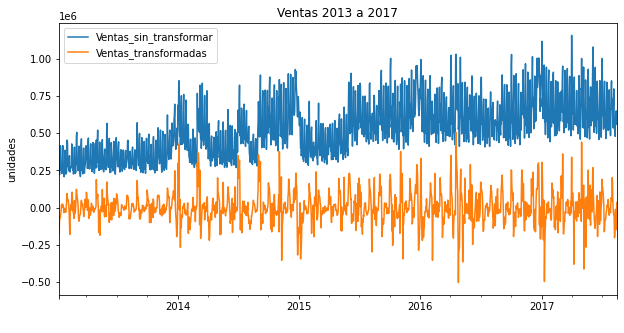

In [19]:
#Comparamos sumatoria de ventas de todas las sucursales sin transformar y transformadas 
df_merge = pd.merge(pd.DataFrame(df_agg), pd.DataFrame(df_agg1), left_index=True, right_index=True)
# Graficamos df (Sumatoria) con valores sin transformar y el df (sumatoria) con valores tranformados
figura(df_merge,
       'Ventas 2013 a 2017',
       'unidades');

In [20]:
ventas2016_2017 = df_agg['2016-08-15':'2017-08-15']
ventas2015_2016 = df_agg['2015-08-15':'2016-08-15']
ventas2016_2017.columns = ['ventas2016_2017']
ventas2015_2016.columns = ['ventas2015_2016']

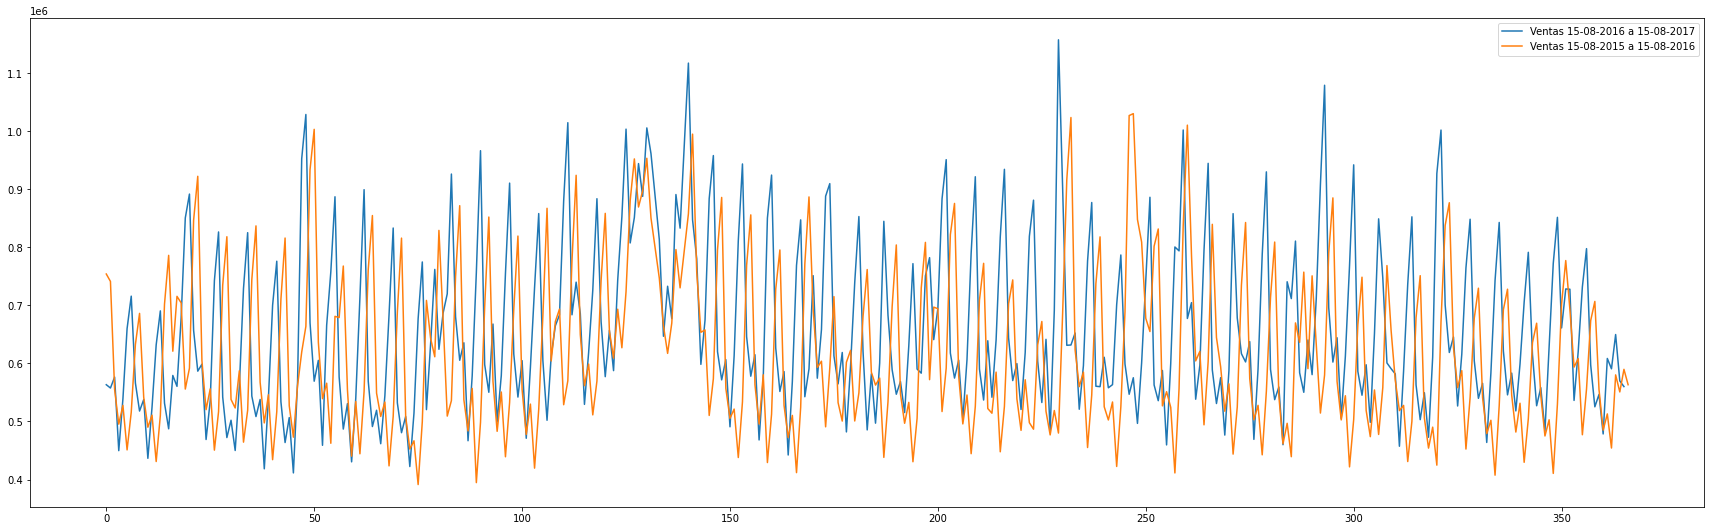

In [21]:
#Comparación de ventas sin transofrmar entre los 2 últimos años de la serie
plt.rcParams['figure.figsize'] = (30, 9)
plt.plot(ventas2016_2017.values, label='Ventas 15-08-2016 a 15-08-2017')
plt.plot(ventas2015_2016.values, label='Ventas 15-08-2015 a 15-08-2016')
plt.legend()

In [22]:
url2 = "https://raw.githubusercontent.com/safranco8/Mentoria2022-G2/main/df_sum.csv"
df_sum = pd.read_csv(url2, index_col=0 ,parse_dates=True)
df_sum

sales      date.1  Year  Month Year_month    Weekday  Day  \
date                                                                           
2013-01-01  49807.780010  2013-01-01  2013      1    2013-01    Tuesday    1   
2013-01-02  49807.780010  2013-01-02  2013      1    2013-01  Wednesday    2   
2013-01-03  37982.626020  2013-01-03  2013      1    2013-01   Thursday    3   
2013-01-04  37766.553008  2013-01-04  2013      1    2013-01     Friday    4   
2013-01-05  44355.684999  2013-01-05  2013      1    2013-01   Saturday    5   
...                  ...         ...   ...    ...        ...        ...  ...   
2017-08-11  63934.322970  2017-08-11  2017      8    2017-08     Friday   11   
2017-08-12  56080.757022  2017-08-12  2017      8    2017-08   Saturday   12   
2017-08-13  63441.041025  2017-08-13  2017      8    2017-08     Sunday   13   
2017-08-14  61365.156900  2017-08-14  2017      8    2017-08     Monday   14   
2017-08-15  61275.160990  2017-08-15  2017      8    2017-08    Tuesday   15   

                   ret_1         ret_2         ret_7  dcoilwtico  
date                                                              
2013-01-01           NaN           NaN           NaN       93.14  
2013-01-02  49807.780010           NaN           NaN       93.14  
2013-01-03  49807.780010  49807.780010           NaN       92.97  
2013-01-04  37982.626020  49807.780010           NaN       93.12  
2013-01-05  37766.553008  37982.626020           NaN       93.20  
...                  ...           ...           ...         ...  
2017-08-11  52308.346000  68254.368030  70643.221034       48.81  
2017-08-12  63934.322970  52308.346000  71393.251000       47.59  
2017-08-13  56080.757022  63934.322970  71856.356000       47.59  
2017-08-14  63441.041025  56080.757022  65591.397002       47.59  
2017-08-15  61365.156900  63441.041025  55179.322000       47.57  

[1688 rows x 11 columns]

# Consignas del trabajo práctico N°3

Se proponen las siguientes actividades motivadoras:

A partir de las series transformadas, se proponen actividades orientadoras, sin perjuicio de que se puedan incorporar análisis adicionales. Las actividades no están separadas en secciones para resaltar que no se trata de pasos aislados.

**Se pide:**

* Realizar la división entre datos de entrenamiento y test usando el procedimiento [Walk-Forward Validation](https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/). Alternativamente se la puede implementar usando [timeSeriesSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html).
* Entrenar al menos un modelo ["baseline"](https://otexts.com/fpp2/simple-methods.html)  (Average Forecast y/o Naive Forecast).
* Identificar cuáles son los parámetros y los hiperparamétros de los modelos SARIMA. 
* Entrenar modelos [SARIMA](https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html).
* Tunear los hiperparamétros. Puede ser útil la función [auto_arima](https://alkaline-ml.com/pmdarima/auto_examples/arima/example_auto_arima.html#sphx-glr-auto-examples-arima-example-auto-arima-py) de la biblioteca pmdarima.
* Entrenar modelos [LSTM](
https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/).
* Entrenar modelos [Prophet](https://facebook.github.io/prophet/docs/quick_start.html#python-api). [Otra referencia](https://towardsdatascience.com/time-series-analysis-with-facebook-prophet-how-it-works-and-how-to-use-it-f15ecf2c0e3a).
* Entrenar un modelo de regresión basado en árboles, por ejemplo [XG Boost Regressor](https://towardsdatascience.com/using-gradient-boosting-for-time-series-prediction-tasks-600fac66a5fc).
* Evaluar el desempeño de los modelos usando varias métricas ([Error Cuadrático Medio](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error), [Error Absoluto Medio](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error), [Error Absoluto Mediano](https://scikit-learn.org/stable/modules/model_evaluation.html#median-absolute-error)). ¿Cómo podemos saber en un problema de regresión si un modelo es "bueno"?¿Se pudo superar a los modelos "baseline"?

**Opcional:**

* Entrenar modelos [SARIMAX](https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html). Estos modelos consisten en modelos SARIMA con el agregado de variables exógenas. Tales variables exógenas pueden ser el precio de petróleo o variables dummy como los días de la semana. Muy recomendable!

* Entrenar modelos de [Suavizado Exponencial Estacionales](https://www.statsmodels.org/dev/examples/notebooks/generated/exponential_smoothing.html#Holt%E2%80%99s-Winters-Seasonal).

## Fecha de entrega

__29/07__ 


## Condiciones de entrega

Realizar un informe en el cual se presenten los resultados y conclusiones del análisis realizado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver tal como los compañeros de clase. Dicho informe puede ser un notebook, a condición de que en el mismo se efectúe un análisis escrito suficientemente detallado de los resultados. 


#**Respuestas a consignas planteadas**

## Train - Test - Validation EJEMPLOS

### **Tran test split**

In [23]:
# Division de entrenamiento y prueba para serie agregada (1 única columna)
X = df_agg1.values
train_size = int(len(X) * 0.70)
train0, test0 = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train0)))
print('Testing Observations: %d' % (len(test0)))

Observations: 1681
Training Observations: 1176
Testing Observations: 505


In [24]:
train00=df_agg1[0:1176] 
test00=df_agg1[1176:]
train00.head(3)

Ventas_transformadas
date                            
2013-01-08        -159673.802943
2013-01-09        -175092.728926
2013-01-10         -90861.160061

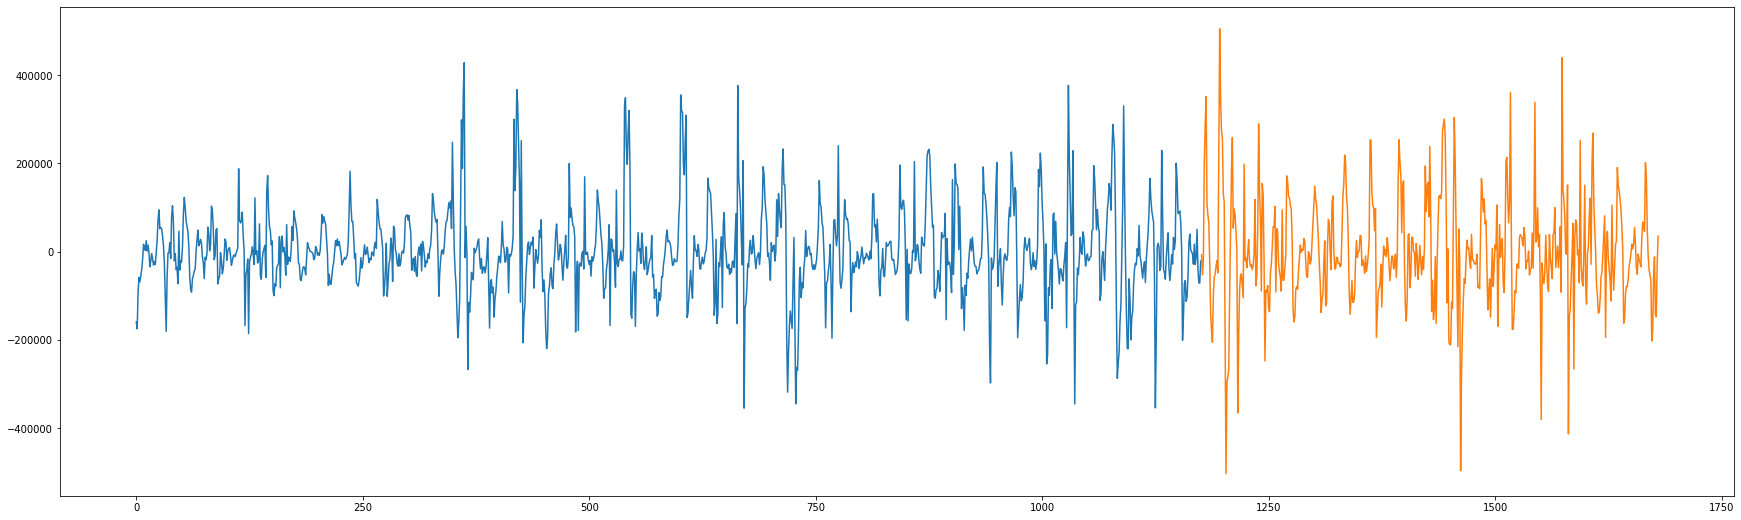

In [25]:
# Grafico de división de serie en entrenamiento y prueba (70/30)
from matplotlib import pyplot
pyplot.plot(train0)
pyplot.rcParams["figure.figsize"] = (12, 8)
pyplot.plot([None for i in train0] + [x for x in test0])
pyplot.show()

## **Escalado**

In [26]:
scaler = MinMaxScaler((0,1))
df_agg_scaled = pd.DataFrame(scaler.fit_transform(df_agg), #fit_transform(df_agg1)
                       index=df_agg.index, 
                       columns=df_agg.columns, dtype=None, copy=False)

In [27]:
sales = df_agg_scaled["Ventas_sin_transformar"]
# sales = df_agg_scaled["Ventas_transformadas"]

In [28]:
n_test_cases = 30
train_model, test_model = train_test_split(df_agg_scaled,n_test_cases)

### **TimeSeriesSplit**

Observations: 841
Training Observations: 421
Testing Observations: 420
Observations: 1261
Training Observations: 841
Testing Observations: 420
Observations: 1681
Training Observations: 1261
Testing Observations: 420


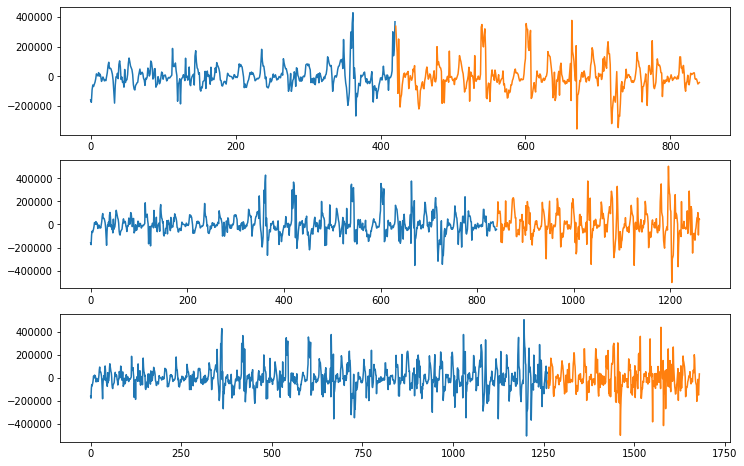

In [29]:
# Dvisión entrenamiento test TimeSeriesSplit

splits = TimeSeriesSplit(n_splits=3)
pyplot.figure(1)
index = 1
for train1_index, test1_index in splits.split(X):
	train1 = X[train1_index]
	test1 = X[test1_index]
	print('Observations: %d' % (len(train1) + len(test1)))
	print('Training Observations: %d' % (len(train1)))
	print('Testing Observations: %d' % (len(test1)))
	pyplot.subplot(310 + index)
	pyplot.plot(train1)
	pyplot.plot([None for i in train1] + [x for x in test1])
	index += 1
pyplot.show()

### **Walk Forward Validación**

In [30]:
n_train = 1650
n_records = len(X)
for i in range(n_train, n_records):
	train2, test2 = X[0:i], X[i:i+1]
	print('train2=%d, test2=%d' % (len(train2), len(test2)))

train2=1650, test2=1
train2=1651, test2=1
train2=1652, test2=1
train2=1653, test2=1
train2=1654, test2=1
train2=1655, test2=1
train2=1656, test2=1
train2=1657, test2=1
train2=1658, test2=1
train2=1659, test2=1
train2=1660, test2=1
train2=1661, test2=1
train2=1662, test2=1
train2=1663, test2=1
train2=1664, test2=1
train2=1665, test2=1
train2=1666, test2=1
train2=1667, test2=1
train2=1668, test2=1
train2=1669, test2=1
train2=1670, test2=1
train2=1671, test2=1
train2=1672, test2=1
train2=1673, test2=1
train2=1674, test2=1
train2=1675, test2=1
train2=1676, test2=1
train2=1677, test2=1
train2=1678, test2=1
train2=1679, test2=1
train2=1680, test2=1


## **Baseline**

### **Naive Forecast**

El algoritmo de persistencia usa el valor en el paso de tiempo anterior (t-1) para predecir el resultado esperado en el siguiente paso de tiempo (t+1).


"Pronóstico ingenuo"

In [31]:
# Dada la observación en t-1, predecimos la observación en t+1.
values = pd.DataFrame(df_agg1.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1 - original']
print(dataframe.head(5))

               t  t+1 - original
0            NaN  -159673.802943
1 -159673.802943  -175092.728926
2 -175092.728926   -90861.160061
3  -90861.160061   -58541.309990
4  -58541.309990   -68875.900182


In [32]:
# División de entrenamiento y test
Xx = dataframe.values
train_size = int(len(Xx) * 0.7)
train, test = Xx[1:train_size], Xx[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [33]:
# Modelo
def model_persistence(x):
	return x

In [34]:
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)

Test MSE: 11889703444.108


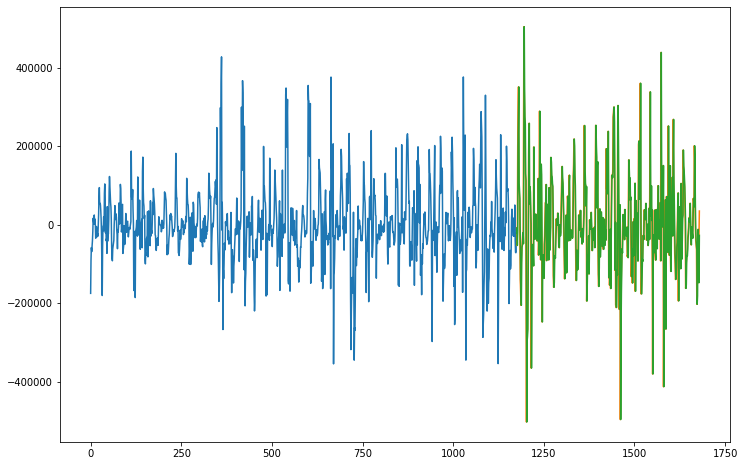

In [35]:
pyplot.plot(train_y)
pyplot.rcParams["figure.figsize"] = (100, 10)
pyplot.plot([None for i in train_y] + [x for x in test_y])
pyplot.plot([None for i in train_y] + [x for x in predictions])
pyplot.show()

### **Naive Forecaste** (2)

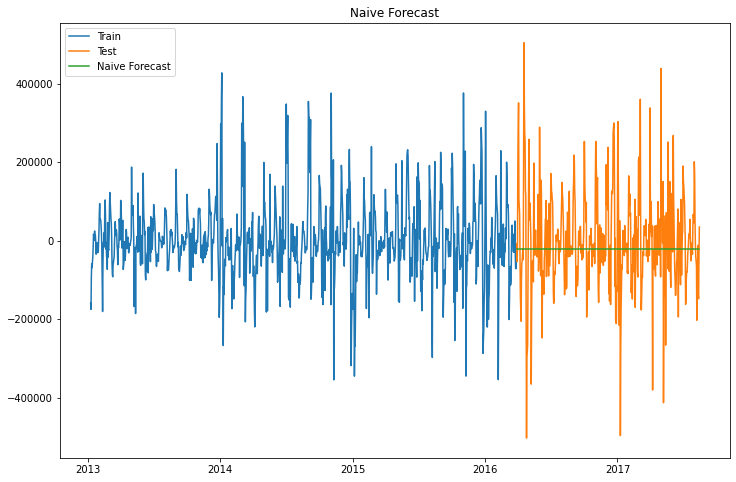

In [36]:
dd= np.asarray(train00.Ventas_transformadas)
y_hat = test00.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train00.index, train00['Ventas_transformadas'], label='Train')
plt.plot(test00.index,test00['Ventas_transformadas'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

### **Average Forecast**

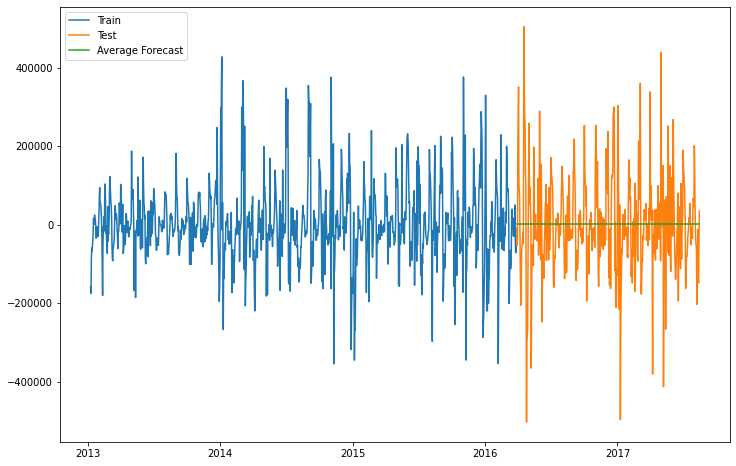

In [37]:
y_hat_avg = test00.copy()
y_hat_avg['avg_forecast'] = train00['Ventas_transformadas'].mean()
plt.figure(figsize=(12,8))
plt.plot(train00['Ventas_transformadas'], label='Train')
plt.plot(test00['Ventas_transformadas'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

## **ARIMA / SARIMA**

### **Descripción teórica**

**ARIMA (Autoregressive Integrated Moving Average)**

ARIMA es un modelo que se utiliza para predecir tendencias futuras en una serie de datos de tiempo. Es un modelo de forma de análisis de regresión. El modelo Arima esta compuesto por 3 términos:

AR (Autoregresión) : Modelo que muestra una variable cambiante que retrocede sobre sus propios valores atrasados/anteriores. 

I (Integrado) : Diferenciación de observaciones sin procesar para permitir que la serie temporal se vuelva estacionaria.

MA (Promedio móvil) : Dependencia entre una observación y un error residual de un modelo de promedio móvil Para los modelos ARIMA, una notación estándar sería ARIMA con p, d y q, donde los valores enteros sustituyen a los parámetros para indicar el tipo de modelo ARIMA utilizado.

p: el número de observaciones de retraso en el modelo; también conocido como el orden de retardo.

d: el número de veces que se diferencian las observaciones sin procesar; también conocido como el grado de diferenciación.

q: el tamaño de la ventana de promedio móvil; también conocido como el orden de la media móvil.

Definición del modelo

El modelo ARIMA es la abreviatura del modelo Autoregresivo de Media Móvil Integrada. La diferencia con el modelo ARMA es pequeña: solo hay un efecto adicional que hace que la serie temporal no sea estacionaria. Un ejemplo simple de esto sería una tendencia lineal creciente, como se muestra en la siguiente ecuación:

            Xt=c+ϵt+∑i=1pϕiXt−i+∑i=1qθiϵt−i+δt 
Al diferenciar una serie temporal, en realidad comienza a modelar las diferencias de un paso a otro en lugar de los valores originales. Si los valores reales de una variable no son estables en el tiempo, aún es posible que las diferencias sean estables en el tiempo.

La tendencia lineal es un gran ejemplo de esto. Imagine una tendencia lineal que comienza desde 0 y se incrementa en 2 cada paso de tiempo. Los valores no serán para nada estacionarios: aumentarán infinitamente. Sin embargo, la diferencia entre cada valor y el siguiente es siempre 2, por lo que la serie temporal diferenciada es perfectamente estacionaria.

|Modelo         |p   d   q |Diferenciado         |Método|
|---------------|----------|---------------------|--------------|
|Arima(0,0,0)   |0   0   0 |$y_t=Y_t$            |Ruido Blanco|
|ARIMA (0,1,0)  |0   1   0 |$y_t = Y_t - Y_{t-1}$| Caminata aleatoria|
|ARIMA (0,2,0)  |0   2   0 |$y_t = Y_t - 2Y_{t-1} + Y_{t-2}$| Constante|
|ARIMA (1,0,0)  |1   0   0 |$\hat Y_t = \mu + \Phi_1 Y_{t-1} + \epsilon $| AR(1): Modelo de regresión de primer orden|
|ARIMA (2, 0, 0)|2   0   0 |$\hat Y_t = \Phi_0 + \Phi_1 Y_{t-1} + \Phi_2 Y_{t-2} + \epsilon$| AR(2): Modelo de regresión de segundo orden|
|ARIMA (1, 1, 0)|1   1   0 |$\hat Y_t = \mu + Y_{t-1} + \Phi_1 (Y_{t-1}- Y_{t-2})$ | Modelo autoregresivo de primer orden diferenciado|
|ARIMA (0, 1, 1)|0   1   1 |$\hat Y_t = Y_{t-1} - \Phi_1 e^{t-1}$| Simple exponential smoothing|
|ARIMA (0, 0, 1)|0   0   1 |$\hat Y_t = \mu_0+ \epsilon_t – \omega_1 \epsilon_{t-1}$| MA(1): Modelo de regresión de primer orden|
ARIMA (0, 0, 2) |0   0   2 |$\hat Y_t = \mu_0+ \epsilon_t – \omega_1 \epsilon_{t-1} – \omega_2 \epsilon_{t-2}$|MA(1): Modelo de regresión de segundo orden|
|ARIMA (1, 0, 1)|1   0   1 |$\hat Y_t = \Phi_0 + \Phi_1 Y_{t-1}+ \epsilon_t – \omega_1 \epsilon_{t-1}$| Modelo ARMA|
|ARIMA (1, 1, 1)|1   1   1 |$\Delta Y_t = \Phi_1 Y_{t-1} + \epsilon_t - \omega_1 \epsilon_{t-1}$ |Modelo ARIMA|
|ARIMA (1, 1, 2)|1   1   2 |$\hat Y_t = Y_{t-1} + \Phi_1 (Y_{t-1} - Y_{t-2} )- \Theta_1 e_{t-1} - \Theta_1 e_{t-1}$|Suavizamiento exponencial lineal de tendencia amortiguada|
|ARIMA (0, 2, 1) OR (0,2,2) |0 2 1 |$\hat Y_t = 2 Y_{t-1} - Y_{t-2} - \Theta_1 e_{t-1} - \Theta_2 e_{t-2}$|  Suavizamiento exponencial lineal|

**Valor de d**

En nuestro caso entendemos que con la segunda diferenciación eliminamos la estacionariedad de la serie. Se puede inferir graficamente aunque tambien se aplica Dickey-Fuller para determinarlo.

**Como encontrar el orden del término AR (p)**

Se puede inferir el número requerido de términos de AR inspeccionando el gráfico de Autocorrelación parcial (PACF).

La Autocorrelación parcial se puede imaginar como la correlación entre la serie y su rezago, despues de excluir las contribuciones de los rezagos intermedios. Entonces la PACF transmite la correlación pura entre un retraso y la serie, de esta manera sabrá si ese retraso es necesario en el plazo de AR o no.

Cualquier autocorrelación en una serie estacionaria se puede rectificar agregando suficientes términos de AR. Entonces, inicialmente tomamos el orden del término AR como igual a ytantos rezagos que cruzan el límite de significancia en la gráfica PACF.

**Como encontrar el orden del término MA (q)**
Se puede mirar el gráfico ACF para inferir el número de términos MA. Un término MA es técnicamente el error del prónostico retrasado.

El ACF indica cuántos términos MA se requieren para eliminar cualquier autocorrelación en la serie estacionaria.

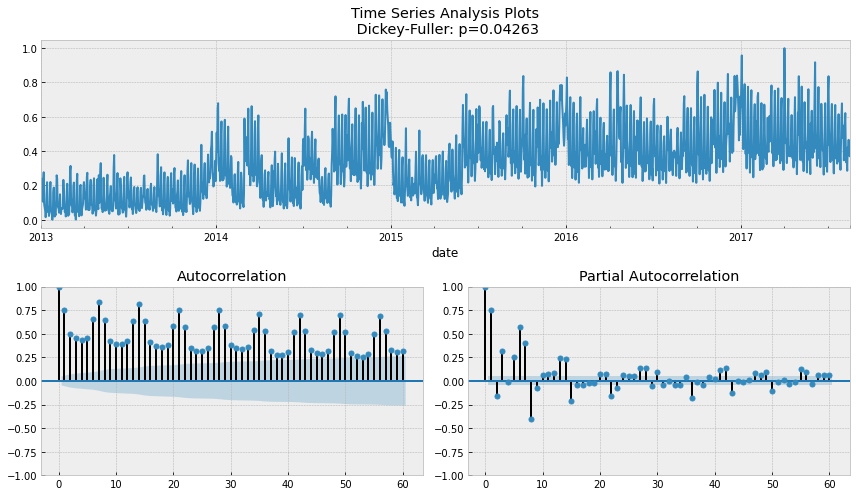

In [38]:
tsplot(sales, lags=60)

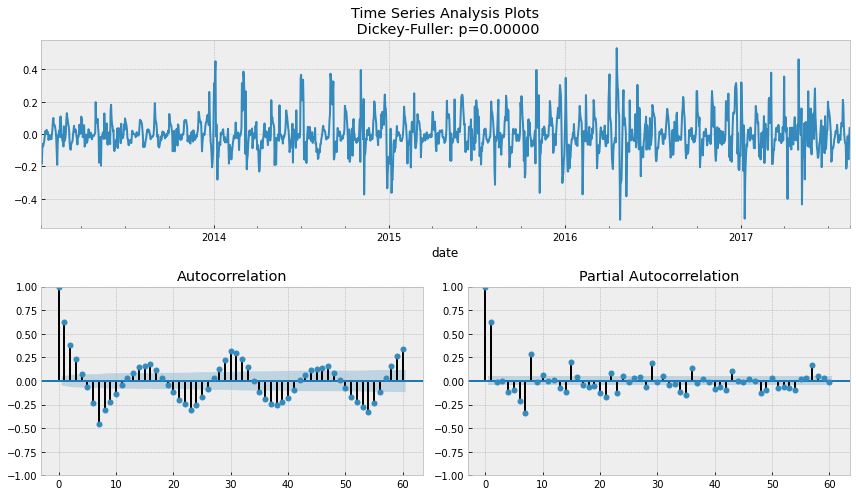

In [39]:
diff = sales.diff(7)
tsplot(diff[7:], lags=60)

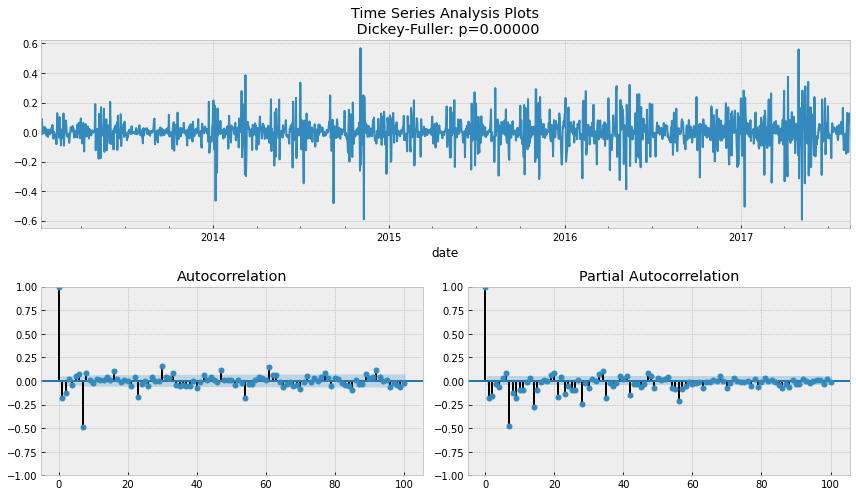

In [40]:
diff = diff.diff(1)
tsplot(diff[7+1:], lags=100)

**Seasonal ARIMA**

Es una extensión de ARIMA que admite explícitamente datos de series temporales univariadas con un componente estacional. Agrega tres nuevos hiperparámetros para especificar la autorregresión (AR), diferenciación (I) y media móvil (MA) para el componente estacional de la serie, así como un parámetro adicional para el período de la estacionalidad.

Hay cuatro elementos estacionales que no forman parte de ARIMA que deben configurarse; ellos son:

P: orden autorregresivo estacional.

D: Orden de diferencia estacional.

P: Orden promedio móvil estacional.

m: El número de pasos de tiempo para un solo período estacional.

### **Modelo SARIMA**

In [42]:
# p=7
# d=1
# q=7
# s=14
# P=4
# D=1
# Q=1
model=sm.tsa.statespace.SARIMAX(train_model, order=(7, 1, 7), 
                                        seasonal_order=(4, 1, 1,14)).fit(disp=-1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [43]:
train_predictions_sarima = scaler.inverse_transform(model.fittedvalues.values.reshape(-1,1)).reshape(-1,)
train_results_sarima = pd.DataFrame(data={'Train Predictions':train_predictions_sarima, 'Actuals':scaler.inverse_transform(train_model.Ventas_sin_transformar.values.reshape(-1,1)).reshape(-1,)})
train_results_sarima

Train Predictions        Actuals
0         207270.842019  434231.998948
1         434231.998772  434231.998948
2         434231.998790  312064.717106
3         312064.717357  307413.870095
4         307413.870255  419180.355196
...                 ...            ...
1653      597058.797602  565555.624946
1654      494666.847893  463807.990928
1655      599235.085439  583362.062387
1656      792298.242252  742607.868059
1657      863538.763543  842517.376033

[1658 rows x 2 columns]

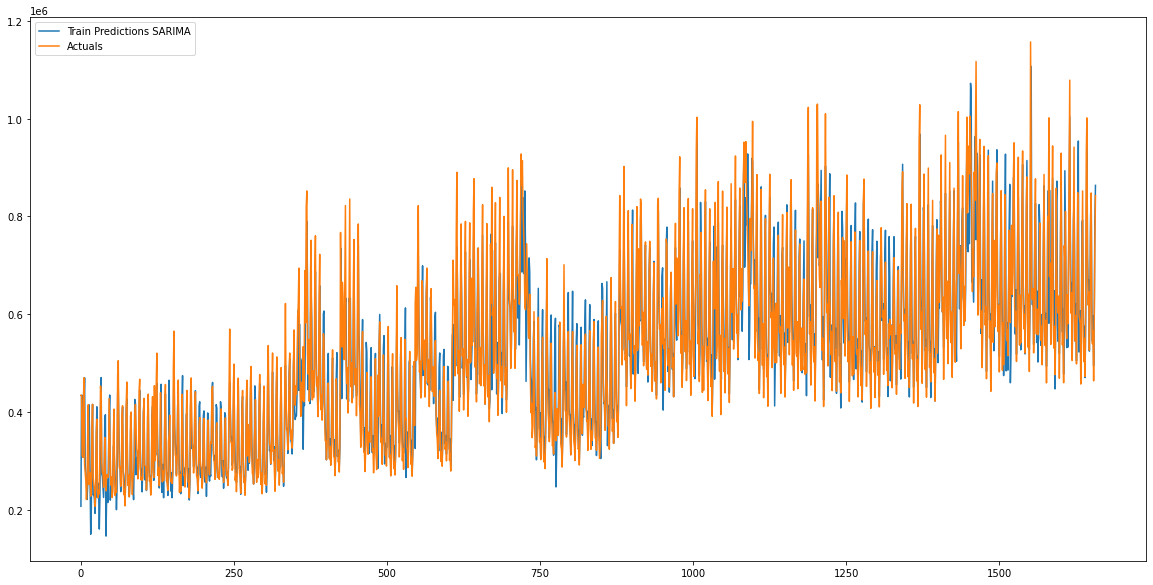

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.plot(train_results_sarima['Train Predictions'], label='Train Predictions SARIMA')
plt.plot(train_results_sarima['Actuals'], label='Actuals')
plt.legend()

In [86]:
test_predictions_sarima = scaler.inverse_transform(model.predict(start = train_model.shape[0], end = train_model.shape[0]+n_test_cases-1).values.reshape(-1,1)).reshape(-1,)
test_results_sarima = pd.DataFrame(data={'Test Predictions SARIMA':test_predictions_sarima, 'Actuals':scaler.inverse_transform(test_model.Ventas_sin_transformar.values.reshape(-1,1)).reshape(-1,)})
test_results_sarima

Test Predictions SARIMA        Actuals
0             600814.457275  621346.094939
1             561058.595714  545708.006931
2             610104.191700  583188.254136
3             506906.774029  518086.718965
4             620987.031484  598427.633231
5             809578.478984  705424.326818
6             861823.551841  791114.838337
7             646598.454194  615271.442097
8             585065.781613  526964.028779
9             625585.653780  558061.351161
10            518646.995174  483512.581081
11            633234.944763  628975.004227
12            804545.921326  772166.940735
13            880170.533365  851308.521905
14            635573.490282  660910.121069
15            601288.248306  728013.488196
16            647858.897601  727569.278911
17            533459.942246  536144.197985
18            650688.445252  620463.686114
19            833494.740204  731602.396689
20            875351.278254  797452.464299
21            665476.484770  597154.917820
22            597902.372239  525147.309119
23            642605.841753  546416.325986
24            542632.888383  478426.718955
25            653586.371839  608388.770991
26            834747.429079  590574.062189
27            930715.252730  649555.601442
28            665914.051416  569765.367959
29            617660.146646  559930.282946

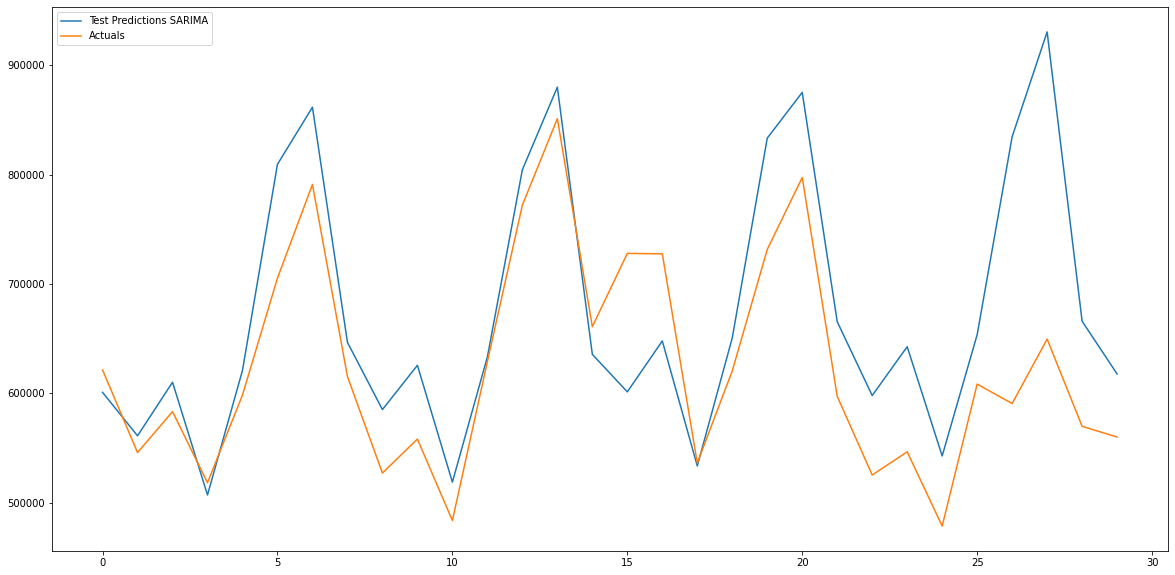

In [46]:
plt.rcParams["figure.figsize"] = (20, 10)
plt.plot(test_results_sarima['Test Predictions'], label='Test Predictions SARIMA')
plt.plot(test_results_sarima['Actuals'], label='Actuals')
plt.legend()

In [77]:
def plotSARIMA(series, model, n_steps):
    """Plots model vs predicted values
        
        series - dataset with timeseries
        model - fitted SARIMA model
        n_steps - number of steps to predict in the future    
    """
    
    # adding model values
    data = series.copy()
    data.columns = ['actual']
    data['sarima_model'] = model.fittedvalues
    # making a shift on s+d steps, because these values were unobserved by the model
    # due to the differentiating
    data['sarima_model'][:s+d] = np.NaN
    
    # forecasting on n_steps forward 
    forecast = model.predict(start = data.shape[0], end = data.shape[0]+n_steps)
    forecast = data.sarima_model.append(forecast)
    # calculate error, again having shifted on s+d steps from the beginning
    error = mean_absolute_percentage_error(data['actual'][s+d:], data['sarima_model'][s+d:])

    plt.figure(figsize=(15, 7))
    plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
    plt.plot(forecast, color='r', label="model")
    plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
    plt.plot(data.actual, label="actual")
    plt.legend()
    plt.grid(True)

In [78]:
plotSARIMA(df_agg_scaled, model, 100)

NameError: ignored

### **Auto Arima**

**Modelo Auto-Arima**
La función auto_arima() obtiene los mejores parametros de p,d,q,P,D,Q

Nota: El parámetro se refiere al número de periodo para cada estacionalidad

7 para los días

12 para los meses

52 para las semanas

4 Trimestral

1 Anual

In [47]:
modelo_auto=pm.auto_arima(df_agg_scaled,start_p=0,d=1,start_q=0,
          max_p=2,max_d=2,max_q=2, start_P=0,
          D=1, start_Q=0, max_P=2,max_D=2,
          max_Q=2, m=7, seasonal=True,
          error_action='warn',trace=True,
          supress_warnings=True,stepwise=True,
          random_state=20,n_fits=50)
print(modelo_auto)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=-3177.789, Time=0.34 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=-3707.896, Time=1.81 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=2.49 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=-3233.947, Time=0.20 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=-3820.868, Time=0.87 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=2.56 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=inf, Time=1.23 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=-3750.772, Time=0.52 sec
 ARIMA(2,1,0)(2,1,0)[7]             : AIC=-3885.817, Time=0.88 sec
 ARIMA(2,1,0)(1,1,0)[7]             : AIC=-3786.416, Time=0.97 sec
 ARIMA(2,1,0)(2,1,1)[7]             : AIC=inf, Time=4.04 sec
 ARIMA(2,1,0)(1,1,1)[7]             : AIC=inf, Time=2.83 sec
 ARIMA(2,1,1)(2,1,0)[7]             : AIC=inf, Time=4.97 sec
 ARIMA(1,1,1)(2,1,0)[7]             : AIC=inf, Time=4.22 sec
 ARIMA(2,1,0)(2,1,0)[7] intercept   : AIC=-3883.819, Time=4.3

In [48]:
model2=sm.tsa.statespace.SARIMAX(train_model, order=(2, 1, 0), 
                                        seasonal_order=(2, 1, 0,7)).fit(disp=-1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [50]:
train_predictions_sarima2 = scaler.inverse_transform(model2.fittedvalues.values.reshape(-1,1)).reshape(-1,)
train_results_sarima2 = pd.DataFrame(data={'Train Predictions2':train_predictions_sarima2, 'Actuals':scaler.inverse_transform(train_model.Ventas_sin_transformar.values.reshape(-1,1)).reshape(-1,)})
train_results_sarima2

Train Predictions2        Actuals
0          207270.842019  434231.998948
1          434231.998732  434231.998948
2          434231.998809  312064.717106
3          312064.717413  307413.870095
4          307413.870222  419180.355196
...                  ...            ...
1653       564751.649172  565555.624946
1654       463629.693069  463807.990928
1655       581540.387584  583362.062387
1656       797265.972293  742607.868059
1657       844266.619896  842517.376033

[1658 rows x 2 columns]

In [85]:
test_predictions_sarima2 = scaler.inverse_transform(model2.predict(start = train_model.shape[0], end = train_model.shape[0]+n_test_cases-1).values.reshape(-1,1)).reshape(-1,)
test_results_sarima2 = pd.DataFrame(data={'Test Predictions SARIMA 2':test_predictions_sarima2, 'Actuals':scaler.inverse_transform(test_model.Ventas_sin_transformar.values.reshape(-1,1)).reshape(-1,)})
test_results_sarima2

Test Predictions SARIMA 2        Actuals
0               573005.209504  621346.094939
1               498531.350775  545708.006931
2               529215.388475  583188.254136
3               427880.239455  518086.718965
4               539908.342853  598427.633231
5               733076.917026  705424.326818
6               820578.478887  791114.838337
7               553500.144978  615271.442097
8               481101.651412  526964.028779
9               508886.139927  558061.351161
10              403133.437031  483512.581081
11              512544.652529  628975.004227
12              681464.092457  772166.940735
13              772921.473520  851308.521905
14              510589.300928  660910.121069
15              439295.124788  728013.488196
16              467739.292237  727569.278911
17              364701.382792  536144.197985
18              477620.505122  620463.686114
19              653702.145089  731602.396689
20              745671.731252  797452.464299
21              479719.447809  597154.917820
22              407214.015884  525147.309119
23              435946.613621  546416.325986
24              332258.385675  478426.718955
25              443581.446552  608388.770991
26              621026.604153  590574.062189
27              711702.591321  649555.601442
28              446897.312772  569765.367959
29              374893.915946  559930.282946

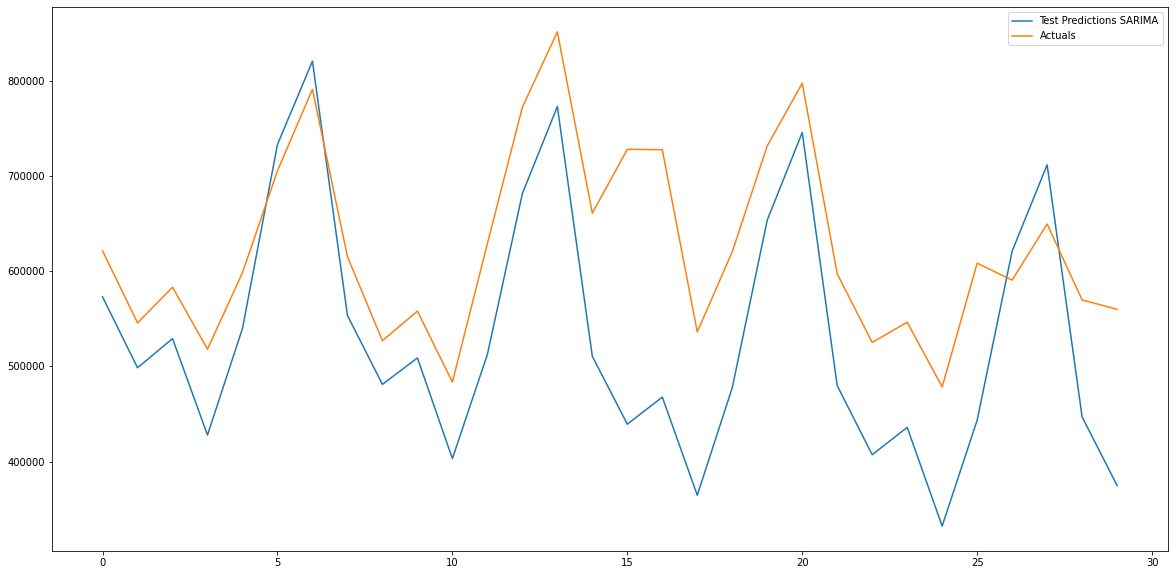

In [52]:
plt.rcParams["figure.figsize"] = (20, 10)
plt.plot(test_results_sarima2['Test Predictions2'], label='Test Predictions SARIMA')
plt.plot(test_results_sarima2['Actuals'], label='Actuals')
plt.legend()

## **LSTM**

### **Descripción teórica**

LSTM significa memoria a corto plazo. Es un modelo o arquitectura que amplía la memoria de las redes neuronales recurrentes. Por lo general, las redes neuronales recurrentes tienen "memoria a corto plazo" en el sentido de que utilizan información anterior persistente para ser utilizada en la red neuronal actual. Esencialmente, la información anterior se utiliza en la presente tarea. Eso significa que no tenemos una lista de toda la información anterior disponible para el nodo neuronal. LSTM introduce la memoria a largo plazo en las redes neuronales recurrentes. Mitiga el problema del gradiente de fuga, que es donde la red neuronal deja de aprender porque las actualizaciones de los diversos pesos dentro de una red neuronal dada se vuelven cada vez más pequeñas. Lo hace mediante el uso de una serie de "puertas". Estos están contenidos en bloques de memoria que están conectados a través de capas, así:

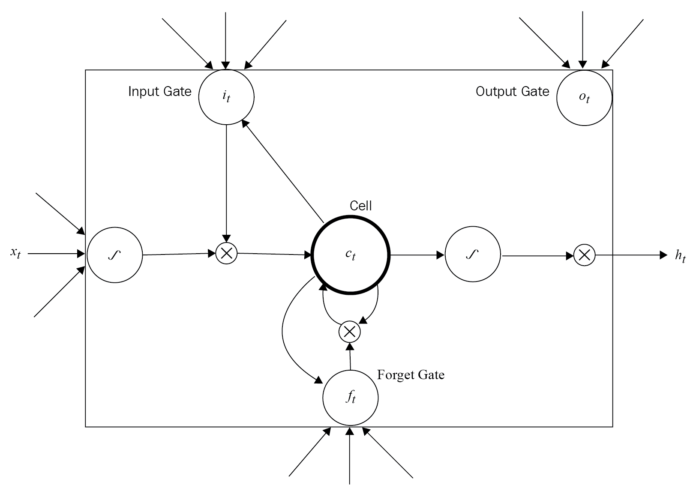

trabajo LSTM Hay tres tipos de puertas dentro de una unidad: Puerta de entrada: escala la entrada a la celda (escritura) Puerta de salida: escala la salida a la celda (lectura) Forget Gate: escala el valor de la celda anterior (restablecer) Cada puerta es como un interruptor que controla la lectura/escritura, incorporando así la función de memoria a largo plazo en el modelo.

**Escalado**
Las LSTMs son sensibles a la escala de los datos de entrada, especialmente cuando se utilizan las funciones de activación sigmoide (por defecto) o tanh. Puede ser una buena práctica reescalar los datos al rango de 0 a 1, también llamado normalización.


**Estructura**
La red LSTM espera que los datos de entrada (X) se proporcionen con una estructura de matriz específica en forma de: [muestras, pasos de tiempo, características]. Nuestros datos preparados están en la forma: [muestras, características] y estamos enmarcando el problema como un paso de tiempo para cada muestra. Podemos transformar los datos de entrada del entrenamiento preparado y de la prueba en la estructura esperada utilizando numpy.reshape() de la siguiente manera:

In [62]:
# [[[1], [2], [3], [4], [5], [6]] [7]
# [[[2], [3], [4], [5], [6], [7]] [8]
# [[[3], [4], [5], [6], [7], [8]] [9]

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i+1:i+window_size+1]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [63]:
WINDOW_SIZE = 14
X1, y1 = df_to_X_y(sales, WINDOW_SIZE)
X1.shape, y1.shape

((1674, 14, 1), (1674,))

In [64]:
n_test_cases = 30
X_train1, X_val1 = train_test_split(X1,n_test_cases)
y_train1, y_val1 = train_test_split(y1,n_test_cases)

**Parámetros** para ajustar el modelo LSTM.

**hidden_layer_sizes**: Debe proporcionar una cantidad de capas ocultas y neuronas para cada capa oculta. Por ejemplo, hidden_layer_sizes – (5,3,3) significa que hay tres capas ocultas y el número de neuronas para la capa uno es 5, para la capa dos es 3 y para la capa tres es 3, respectivamente. El valor predeterminado es (100), es decir, una capa oculta con 100 neuronas.

**activation**: Esta es la función de activación de una capa oculta; hay cuatro funciones de activación disponibles para su uso; el valor predeterminado es "relu". relu: La función de unidad lineal rectificada, devuelve logística: La función sigmoidea logística, devuelve f(x) = 1 / (1 + exp(-x)). identidad: activación sin operación, útil para implementar un cuello de botella lineal, devuelve f(x) = x tanh: La función tan hiperbólica, devuelve.

**solver**: Esto es para optimizar el peso. Hay tres opciones disponibles, la predeterminada es "adam". adam: Optimizador basado en gradiente estocástico propuesto por Diederik Kingma y Jimmy Ba, que funciona bien para un gran conjunto de datos lbfgs: Pertenece a la familia de métodos cuasi-Newton, funciona bien para conjuntos de datos pequeños sgd: Descenso de gradiente estocástico

**max_iter**: Este es el número máximo de iteraciones para que el solucionador converja, el valor predeterminado es 200.

**learning_rate_init**: Esta es la tasa de aprendizaje inicial para controlar el tamaño de paso para actualizar los pesos (solo se aplica a los solucionadores sgd/ adam), el valor predeterminado es 0,001.

In [56]:
model_LSTM = Sequential()
model_LSTM.add(LSTM(15, activation='relu', input_shape=(14, 1)))
model_LSTM.add(Dense(1))
model_LSTM.compile(loss='mse', optimizer='adam')

In [66]:
#WF validation
def wf_validation(x_train,y_train,epochs=20,batch=2,n_train=1670):
  n_records = len(x_train)
  errors = []
  for i in range(n_train, n_records):
    x_train_wf, x_test_wf = x_train[0:i], x_train[i:i+1]
    y_train_wf, y_test_wf = y_train[0:i], y_train[i:i+1]
    model_LSTM.fit(x_train_wf, y_train_wf, epochs=epochs, batch_size=batch, verbose=0, shuffle=False)
    test_predictions = model_LSTM.predict(x_test_wf).flatten()
    error = measure_rmse(test_predictions,y_test_wf)
    errors.append(error)
    print(' > %.3f' % error)
  return np.mean(errors)

In [67]:
mean_errors = wf_validation(X1,y1,epochs=20,batch=20,n_train=1670)
mean_errors

NameError: ignored

In [57]:
model_LSTM.fit(X_train1, y_train1, epochs=20, batch_size=20, verbose=1, shuffle=False)

Epoch 1/20
83/83 [==============================] - 2s 4ms/step - loss: 0.0150
Epoch 2/20
83/83 [==============================] - 0s 4ms/step - loss: 0.0121
Epoch 3/20
83/83 [==============================] - 0s 4ms/step - loss: 0.0091
Epoch 4/20
83/83 [==============================] - 0s 4ms/step - loss: 0.0048
Epoch 5/20
83/83 [==============================] - 0s 4ms/step - loss: 0.0034
Epoch 6/20
83/83 [==============================] - 0s 4ms/step - loss: 0.0018
Epoch 7/20
83/83 [==============================] - 1s 9ms/step - loss: 0.0012
Epoch 8/20
83/83 [==============================] - 1s 8ms/step - loss: 8.5715e-04
Epoch 9/20
83/83 [==============================] - 1s 7ms/step - loss: 7.2316e-04
Epoch 10/20
83/83 [==============================] - 1s 7ms/step - loss: 6.1930e-04
Epoch 11/20
83/83 [==============================] - 1s 6ms/step - loss: 5.4007e-04
Epoch 12/20
83/83 [==============================] - 0s 4ms/step - loss: 4.7460e-04
Epoch 13/20
83/83 [==========

In [58]:
train_predictions_lstm = scaler.inverse_transform(model_LSTM.predict(X_train1)).flatten()
train_results_lstm = pd.DataFrame(data={'Train Predictions LSTM':train_predictions_lstm, 'Actuals':scaler.inverse_transform(y_train1.reshape(-1,1)).reshape(-1,)})
train_results_lstm

Train Predictions LSTM        Actuals
0               280295.43750  256991.311944
1               291145.18750  275534.804944
2               254346.12500  228054.963976
3               268093.18750  251406.550009
4               365230.65625  374921.655026
...                      ...            ...
1639            569285.50000  565555.624946
1640            467720.62500  463807.990928
1641            588498.06250  583362.062387
1642            744549.50000  742607.868059
1643            842766.75000  842517.376033

[1644 rows x 2 columns]

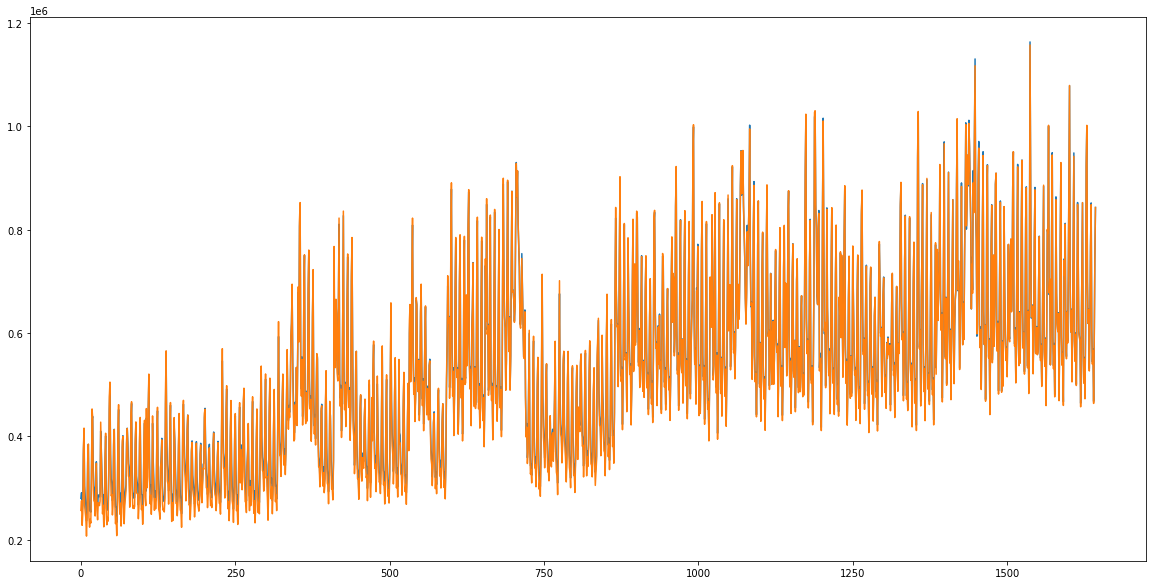

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.plot(train_results_lstm['Train Predictions LSTM'])
plt.plot(train_results_lstm['Actuals'])

In [60]:
val_predictions = scaler.inverse_transform(model_LSTM.predict(X_val1, batch_size=15)).flatten()
val_results = pd.DataFrame(data={'Val Predictions LSTM':val_predictions, 'Actuals':scaler.inverse_transform(y_val1.reshape(-1,1)).reshape(-1,)})
val_results

Val Predictions LSTM        Actuals
0           623689.31250  621346.094939
1           549576.00000  545708.006931
2           585735.25000  583188.254136
3           522942.96875  518086.718965
4           602144.87500  598427.633231
5           706484.62500  705424.326818
6           791108.00000  791114.838337
7           620231.62500  615271.442097
8           533394.00000  526964.028779
9           562211.18750  558061.351161
10          489965.65625  483512.581081
11          631386.25000  628975.004227
12          771352.93750  772166.940735
13          850312.93750  851308.521905
14          663473.18750  660910.121069
15          727914.56250  728013.488196
16          726705.18750  727569.278911
17          539754.06250  536144.197985
18          625249.93750  620463.686114
19          734245.62500  731602.396689
20          800306.56250  797452.464299
21          601962.93750  597154.917820
22          531610.62500  525147.309119
23          551716.68750  546416.325986
24          484194.46875  478426.718955
25          612907.25000  608388.770991
26          593592.93750  590574.062189
27          652084.43750  649555.601442
28          573068.50000  569765.367959
29          563564.37500  559930.282946

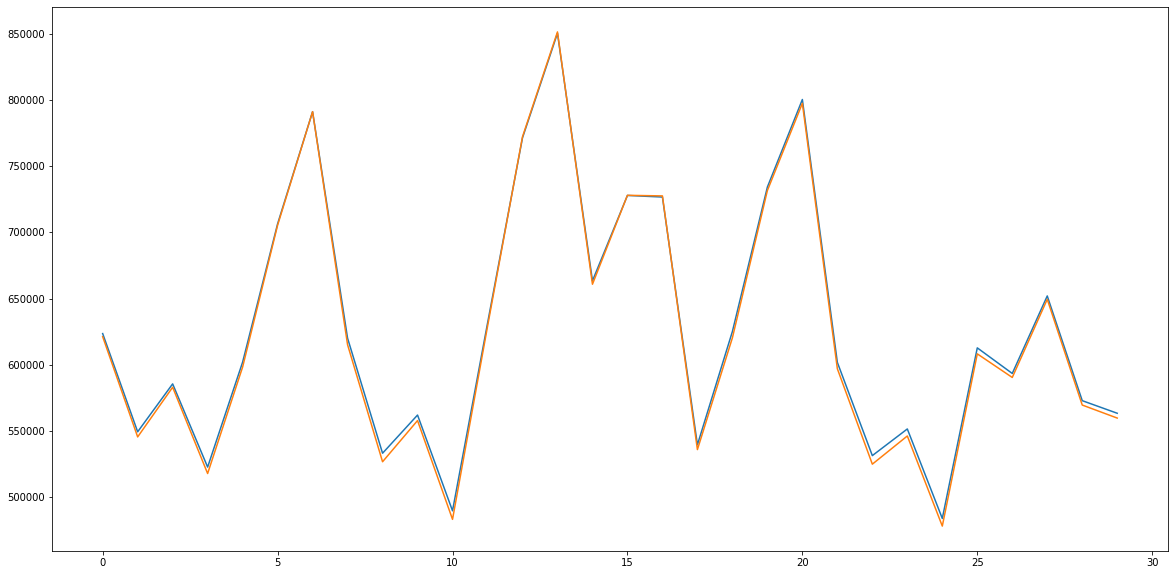

In [61]:
plt.figure(figsize=(20, 10))
plt.plot(val_results['Val Predictions LSTM'])
plt.plot(val_results['Actuals'])

In [ ]:

# # grid search lstm for airline passengers
# from math import sqrt
# from numpy import array
# from numpy import mean
# from pandas import DataFrame
# from pandas import concat
# from pandas import read_csv
# from sklearn.metrics import mean_squared_error
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM
 
# # split a univariate dataset into train/test sets
# def train_test_split(data, n_test):
# 	return data[:-n_test], data[-n_test:]
 
# # transform list into supervised learning format
# def series_to_supervised(data, n_in=1, n_out=1):
# 	df = DataFrame(data)
# 	cols = list()
# 	# input sequence (t-n, ... t-1)
# 	for i in range(n_in, 0, -1):
# 		cols.append(df.shift(i))
# 	# forecast sequence (t, t+1, ... t+n)
# 	for i in range(0, n_out):
# 		cols.append(df.shift(-i))
# 	# put it all together
# 	agg = concat(cols, axis=1)
# 	# drop rows with NaN values
# 	agg.dropna(inplace=True)
# 	return agg.values
 
# # root mean squared error or rmse
# def measure_rmse(actual, predicted):
# 	return sqrt(mean_squared_error(actual, predicted))
 
# # difference dataset
# def difference(data, order):
# 	return [data[i] - data[i - order] for i in range(order, len(data))]
 
# # fit a model
# def model_fit(train, config):
# 	# unpack config
# 	n_input, n_nodes, n_epochs, n_batch, n_diff = config
# 	# prepare data
# 	if n_diff > 0:
# 		train = difference(train, n_diff)
# 	# transform series into supervised format
# 	data = series_to_supervised(train, n_in=n_input)
# 	# separate inputs and outputs
# 	train_x, train_y = data[:, :-1], data[:, -1]
# 	# reshape input data into [samples, timesteps, features]
# 	n_features = 1
# 	train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], n_features))
# 	# define model
# 	model = Sequential()
# 	model.add(LSTM(n_nodes, activation='relu', input_shape=(n_input, n_features)))
# 	model.add(Dense(n_nodes, activation='relu'))
# 	model.add(Dense(1))
# 	model.compile(loss='mse', optimizer='adam')
# 	# fit model
# 	model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
# 	return model
 
# # forecast with the fit model
# def model_predict(model, history, config):
# 	# unpack config
# 	n_input, _, _, _, n_diff = config
# 	# prepare data
# 	correction = 0.0
# 	if n_diff > 0:
# 		correction = history[-n_diff]
# 		history = difference(history, n_diff)
# 	# reshape sample into [samples, timesteps, features]
# 	x_input = array(history[-n_input:]).reshape((1, n_input, 1))
# 	# forecast
# 	yhat = model.predict(x_input, verbose=0)
# 	return correction + yhat[0]
 
# # walk-forward validation for univariate data
# def walk_forward_validation(data, n_test, cfg):
# 	predictions = list()
# 	# split dataset
# 	train, test = train_test_split(data, n_test)
# 	# fit model
# 	model = model_fit(train, cfg)
# 	# seed history with training dataset
# 	history = [x for x in train]
# 	# step over each time-step in the test set
# 	for i in range(len(test)):
# 		# fit model and make forecast for history
# 		yhat = model_predict(model, history, cfg)
# 		# store forecast in list of predictions
# 		predictions.append(yhat)
# 		# add actual observation to history for the next loop
# 		history.append(test[i])
# 	# estimate prediction error
# 	error = measure_rmse(test, predictions)
# 	print(' > %.3f' % error)
# 	return error
 
# # score a model, return None on failure
# def repeat_evaluate(data, config, n_test, n_repeats=10):
# 	# convert config to a key
# 	key = str(config)
# 	# fit and evaluate the model n times
# 	scores = [walk_forward_validation(data, n_test, config) for _ in range(n_repeats)]
# 	# summarize score
# 	result = mean(scores)
# 	print('> Model[%s] %.3f' % (key, result))
# 	return (key, result)
 
# # grid search configs
# def grid_search(data, cfg_list, n_test):
# 	# evaluate configs
# 	scores = [repeat_evaluate(data, cfg, n_test) for cfg in cfg_list]
# 	# sort configs by error, asc
# 	scores.sort(key=lambda tup: tup[1])
# 	return scores
 
# # create a list of configs to try
# def model_configs():
# 	# define scope of configs
# 	# n_input = [14, 28]
# 	# n_nodes = [50,100,150]
# 	# n_epochs = [50,100]
# 	# n_batch = [150, 200, 250]
# 	# n_diff = [7,14,28]
# 	n_input = [14]
# 	n_nodes = [150]
# 	n_epochs = [100]
# 	n_batch = [200]
# 	n_diff = [7]
# 	# create configs
# 	configs = list()
# 	for i in n_input:
# 		for j in n_nodes:
# 			for k in n_epochs:
# 				for l in n_batch:
# 					for m in n_diff:
# 						cfg = [i, j, k, l, m]
# 						configs.append(cfg)
# 	print('Total configs: %d' % len(configs))
# 	return configs
 
# # define dataset
# # series = read_csv('monthly-airline-passengers.csv', header=0, index_col=0)
# data = sales
# # data split
# n_test = 12
# # model configs
# cfg_list = model_configs()
# # grid search
# scores = grid_search(data, cfg_list, n_test)
# print('done')
# # list top 10 configs
# for cfg, error in scores[:3]:
# 	print(cfg, error)

##**Prophet**
(PROBAR CON LOG!!)

In [68]:
from prophet import Prophet
import itertools
from prophet.diagnostics import cross_validation, performance_metrics

In [69]:
df_prophet = pd.DataFrame()
df_prophet['ds'] = pd.to_datetime(df_agg_scaled.index, format="%Y/%m/%d")
df_prophet['y'] = df_agg_scaled["Ventas_sin_transformar"].values
df_prophet

ds         y
0    2013-01-01  0.238992
1    2013-01-02  0.238992
2    2013-01-03  0.110349
3    2013-01-04  0.105451
4    2013-01-05  0.223142
...         ...       ...
1683 2017-08-11  0.422380
1684 2017-08-12  0.403621
1685 2017-08-13  0.465729
1686 2017-08-14  0.381710
1687 2017-08-15  0.371353

[1688 rows x 2 columns]

In [70]:
model_Prophet = Prophet()
model_Prophet.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwlhae7au/c8u6cu_t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwlhae7au/xo1rr1j7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35321', 'data', 'file=/tmp/tmpwlhae7au/c8u6cu_t.json', 'init=/tmp/tmpwlhae7au/xo1rr1j7.json', 'output', 'file=/tmp/tmpjft5zivo/prophet_model-20220908200437.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:04:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:04:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [72]:
future = model_Prophet.make_future_dataframe(periods=30)
forecast = model_Prophet.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

ds      yhat  yhat_lower  yhat_upper
0    2013-01-01  0.164086    0.044372    0.271417
1    2013-01-02  0.180573    0.074333    0.301700
2    2013-01-03  0.089612   -0.031311    0.207211
3    2013-01-04  0.149225    0.033811    0.258613
4    2013-01-05  0.302666    0.192910    0.409461
...         ...       ...         ...         ...
1713 2017-09-10  0.700246    0.585537    0.811504
1714 2017-09-11  0.499901    0.389649    0.604604
1715 2017-09-12  0.454740    0.342965    0.569598
1716 2017-09-13  0.481634    0.368457    0.601298
1717 2017-09-14  0.401465    0.286622    0.513223

[1718 rows x 4 columns]

In [73]:
train_prediction_prophet = forecast["yhat"]
train_results_prophet = pd.DataFrame(data={'Train Predictions':scaler.inverse_transform(train_prediction_prophet[:1674].values.reshape(-1,1)).reshape(-1,), 'Actuals':scaler.inverse_transform(y1.reshape(-1,1)).reshape(-1,)})
train_results_prophet

Train Predictions        Actuals
0         363096.530612  256991.311944
1         378754.279599  275534.804944
2         292371.754505  228054.963976
3         348983.695374  251406.550009
4         494701.164637  374921.655026
...                 ...            ...
1669      615099.365528  608388.770991
1670      767871.771550  590574.062189
1671      822565.090522  649555.601442
1672      628388.435451  569765.367959
1673      581700.878940  559930.282946

[1674 rows x 2 columns]

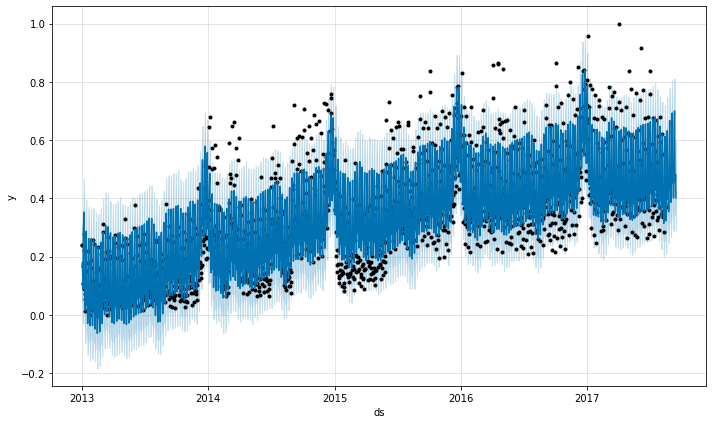

In [74]:
fig1 = model_Prophet.plot(forecast)

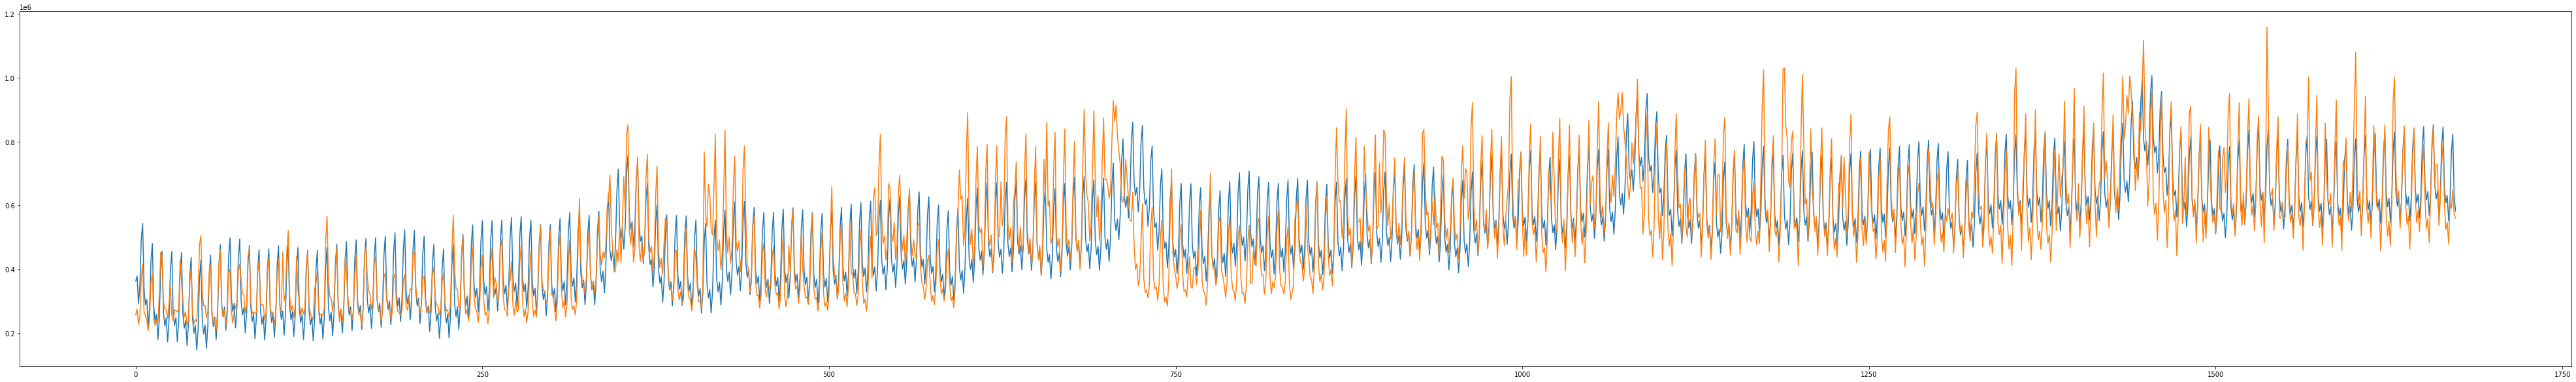

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize=(70, 10))
plt.plot(train_results_prophet['Train Predictions'])
plt.plot(train_results_prophet['Actuals'])

In [76]:
# Cross validation
baseline_model_cv = cross_validation(model=model_Prophet, initial='300 days', period='100 days', horizon = '1 days', parallel="processes")
baseline_model_cv

INFO:prophet:Making 14 forecasts with cutoffs between 2014-01-22 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fd25c03ba90>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwlhae7au/hufecf_c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwlhae7au/55v_1lma.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwlhae7au/w528uvre.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwlhae7au/f7lv0f6c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48420', 'data', 'file=/tmp/tmpwlhae7au/55v_1lma.json', 'init=/tmp/tmpwlhae7au/f7lv0f6c.json', 'output', 'file=/tmp/tmpilj5as6g/prophet_model-20220908200532.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/pyth

ds      yhat  yhat_lower  yhat_upper         y     cutoff
0  2014-01-23  0.245996    0.187235    0.306596  0.193103 2014-01-22
1  2014-05-03  0.337823    0.265238    0.414393  0.349113 2014-05-02
2  2014-08-11  0.202045    0.125748    0.281963  0.150480 2014-08-10
3  2014-11-19  0.353020    0.266407    0.438177  0.301134 2014-11-18
4  2015-02-27  0.222734    0.116805    0.325309  0.157476 2015-02-26
5  2015-06-07  0.393467    0.286118    0.500354  0.731760 2015-06-06
6  2015-09-15  0.399684    0.296874    0.503915  0.332639 2015-09-14
7  2015-12-24  0.521137    0.415060    0.627040  0.677024 2015-12-23
8  2016-04-02  0.509134    0.399724    0.620158  0.746084 2016-04-01
9  2016-07-11  0.490646    0.378415    0.607087  0.351257 2016-07-10
10 2016-10-19  0.393684    0.271804    0.505516  0.328449 2016-10-18
11 2017-01-27  0.388533    0.265611    0.500195  0.380759 2017-01-26
12 2017-05-07  0.628909    0.502433    0.739920  0.776036 2017-05-06
13 2017-08-15  0.370410    0.249491    0.481491  0.371353 2017-08-14

In [77]:
baseline_model_cv

ds      yhat  yhat_lower  yhat_upper         y     cutoff
0  2014-01-23  0.245996    0.187235    0.306596  0.193103 2014-01-22
1  2014-05-03  0.337823    0.265238    0.414393  0.349113 2014-05-02
2  2014-08-11  0.202045    0.125748    0.281963  0.150480 2014-08-10
3  2014-11-19  0.353020    0.266407    0.438177  0.301134 2014-11-18
4  2015-02-27  0.222734    0.116805    0.325309  0.157476 2015-02-26
5  2015-06-07  0.393467    0.286118    0.500354  0.731760 2015-06-06
6  2015-09-15  0.399684    0.296874    0.503915  0.332639 2015-09-14
7  2015-12-24  0.521137    0.415060    0.627040  0.677024 2015-12-23
8  2016-04-02  0.509134    0.399724    0.620158  0.746084 2016-04-01
9  2016-07-11  0.490646    0.378415    0.607087  0.351257 2016-07-10
10 2016-10-19  0.393684    0.271804    0.505516  0.328449 2016-10-18
11 2017-01-27  0.388533    0.265611    0.500195  0.380759 2017-01-26
12 2017-05-07  0.628909    0.502433    0.739920  0.776036 2017-05-06
13 2017-08-15  0.370410    0.249491    0.481491  0.371353 2017-08-14

In [79]:
# Model performance metrics
baseline_model_p = performance_metrics(baseline_model_cv, rolling_window=0)
baseline_model_p.head()

horizon       mse     rmse       mae      mape     mdape     smape  coverage
0  1 days  0.018379  0.13557  0.099395  0.232523  0.215904  0.231028  0.642857

In [78]:
# Change point range
# Initiate the model
manual_model = Prophet(changepoint_range=0.9)
# Fit the model on the training dataset
manual_model.fit(df_prophet)
# Cross validation
manual_model_cv = cross_validation(manual_model, initial='300 days', period='100 days', horizon = '1 days', parallel="processes")
# Model performance metrics
manual_model_p = performance_metrics(manual_model_cv, rolling_window=1)
manual_model_p['rmse'].values[0]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwlhae7au/nwzyxot6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwlhae7au/c2uxlcxt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26565', 'data', 'file=/tmp/tmpwlhae7au/nwzyxot6.json', 'init=/tmp/tmpwlhae7au/c2uxlcxt.json', 'output', 'file=/tmp/tmp_m2ff1ok/prophet_model-20220908200607.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:06:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:06:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 14 forecasts with cutoffs between 2014-01-22 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.

0.1341793138843892

In [ ]:
# Set up parameter grid
param_grid = {  
    'changepoint_range': [0.9],
    'changepoint_prior_scale': [0.001, 0.05, 0.08, 0.5],
    'seasonality_prior_scale': [0.01, 1, 5, 10, 12],
    'seasonality_mode': ['additive', 'multiplicative']
}
# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
# Create a list to store MAPE values for each combination
rmses = [] 
print(len(all_params))
# Use cross validation to evaluate all parameters
for params in all_params:
    print(">>>>>>>>>>>>>>>>>>>>>>>",params,"<<<<<<<<<<<<<<<<<<<<<<<<<<<<")
    # Fit a model using one parameter combination
    m = Prophet(**params).fit(df_prophet)  
    # Cross-validation
    df_cv = cross_validation(m, initial='400 days', period='100 days', horizon = '1 days', parallel="processes")
    # Model performance
    df_p = performance_metrics(df_cv, rolling_window=0)
    # Save model performance metrics
    rmses.append(df_p['rmse'].values[0])
    
# Tuning results
tuning_results = pd.DataFrame(all_params)
tuning_results['rmses'] = rmses
# Find the best parameters
best_params = all_params[np.argmin(rmses)]
print(best_params)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/anbsepl0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/v_pcj908.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60788', 'data', 'file=/tmp/tmpie1lmgd9/anbsepl0.json', 'init=/tmp/tmpie1lmgd9/v_pcj908.json', 'output', 'file=/tmp/tmp2pg59j2c/prophet_model-20220822045304.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:53:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


80
>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.8, 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'additive'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


04:53:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599f1bb510>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/i3u08_ov.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/ks9rfh0d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/mddhpuq_.json
DEBUG:cmdstanpy:idx 0
04:53:05 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20679', 'data', 'file=/tmp/tmpie1lmgd9/ks9rfh0d.json', 'init=/tmp/tmpie1lmgd9/mddhpuq_.json', 'output', 'file=/tmp/tmpy4yb3pup/prophet_model-20220822045305.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
INFO:cmdstanpy:Chain [1] start pr

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.8, 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


04:53:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599daa0890>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/xkrcfrvc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/mlkvd6su.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/wc9bawp7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17905', 'data', 'file=/tmp/tmpie1lmgd9/xkrcfrvc.json', 'init=/tmp/tmpie1lmgd9/wc9bawp7.json', 'output', 'file=/tmp/tmphejv8x51/prophet_model-20220822045334.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:53:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start pr

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.8, 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 1, 'seasonality_mode': 'additive'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/9wglswq_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/3v2wi71c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36077', 'data', 'file=/tmp/tmpie1lmgd9/9wglswq_.json', 'init=/tmp/tmpie1lmgd9/3v2wi71c.json', 'output', 'file=/tmp/tmp5e43d5y2/prophet_model-20220822045401.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:54:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:54:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.8, 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 1, 'seasonality_mode': 'multiplicative'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


04:54:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599f1f9a90>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/zslk5m45.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/z_ad3sus.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/2ik8ndz6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/x4hfuq0h.json
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65012', 'data', 'file=/tmp/tmpie1lmgd9/zslk5m45.json', 'init=/tmp/tmpie1lmgd9/2ik8ndz6.json', 'output', 'file=/tmp/tmprkg88vux/prophet_model-20220822045432.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:54:32 - cmdstanpy - INFO

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.8, 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 5, 'seasonality_mode': 'additive'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


04:55:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599f1b69d0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/d6qje3if.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/lm440je8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/wleigy2d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32069', 'data', 'file=/tmp/tmpie1lmgd9/d6qje3if.json', 'init=/tmp/tmpie1lmgd9/wleigy2d.json', 'output', 'file=/tmp/tmpr83lvik5/prophet_model-20220822045502.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/um20fvi3.json
DEBUG:cmdstanpy:idx 0
DEBUG

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.8, 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 5, 'seasonality_mode': 'multiplicative'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


04:55:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f5a0251d4d0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/a_shjv9d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/4edkgwgg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/wxdk_f42.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17728', 'data', 'file=/tmp/tmpie1lmgd9/a_shjv9d.json', 'init=/tmp/tmpie1lmgd9/wxdk_f42.json', 'output', 'file=/tmp/tmp3sl9od6y/prophet_model-20220822045531.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/g07u12du.json
04:55:31 - cmdstanpy - INFO

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.8, 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10, 'seasonality_mode': 'additive'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


04:56:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599de0aed0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/e8y2fnxl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/3hgsxuzq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/9y2viq1k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/f_4lxka7.json
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96483', 'data', 'file=/tmp/tmpie1lmgd9/e8y2fnxl.json', 'init=/tmp/tmpie1lmgd9/9y2viq1k.json', 'output', 'file=/tmp/tmpg75yikaz/prophet_model-20220822045603.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.8, 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10, 'seasonality_mode': 'multiplicative'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


04:56:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f5a02518710>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/3qccp9ey.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/rsfn5pw7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/_mce1p0y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/uov338o1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37373', 'data', 'file=/tmp/tmpie1lmgd9/3qccp9ey.json', 'init=/tmp/tmpie1lmgd9/_mce1p0y.json', 'output', 'file=/tmp/tmp35460lcs/prophet_model-20220822045629.csv', 'metho

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.8, 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 12, 'seasonality_mode': 'additive'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


04:56:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599da96e50>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/z_w71g1i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/edpzyy1j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36632', 'data', 'file=/tmp/tmpie1lmgd9/z_w71g1i.json', 'init=/tmp/tmpie1lmgd9/edpzyy1j.json', 'output', 'file=/tmp/tmpo3_l7bea/prophet_model-20220822045658.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/i0hpfw5k.json
04:56:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start pr

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.8, 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 12, 'seasonality_mode': 'multiplicative'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


04:57:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f5a02caee50>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/kzfoo068.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/oyfix89v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/i0eso1sa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41759', 'data', 'file=/tmp/tmpie1lmgd9/kzfoo068.json', 'init=/tmp/tmpie1lmgd9/i0eso1sa.json', 'output', 'file=/tmp/tmpanh81y3c/prophet_model-20220822045726.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/n0a2p9eh.json
04:57:26 - cmdstanpy - INFO

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.8, 'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'additive'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


04:57:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599f1789d0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/5a51jblm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/p77jth76.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/0j6sggq8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/93rchh63.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89664', 'data', 'file=/tmp/tmpie1lmgd9/5a51jblm.json', 'init=/tmp/tmpie1lmgd9/93rchh63.json', 'output', 'file=/tmp/tmpoaemqujv/prophet_model-20220822045753.csv', 'metho

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.8, 'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


04:58:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f5a02868bd0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/i9yw079r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/m188ur50.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/bbjimg_u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73359', 'data', 'file=/tmp/tmpie1lmgd9/i9yw079r.json', 'init=/tmp/tmpie1lmgd9/bbjimg_u.json', 'output', 'file=/tmp/tmphuzuimp0/prophet_model-20220822045814.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:58:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start pr

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.8, 'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 1, 'seasonality_mode': 'additive'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


04:58:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599dce1090>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/b7zena2x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/pkc88yt2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/o57xao_0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29472', 'data', 'file=/tmp/tmpie1lmgd9/b7zena2x.json', 'init=/tmp/tmpie1lmgd9/o57xao_0.json', 'output', 'file=/tmp/tmpii0rbcph/prophet_model-20220822045835.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/x2oazas3.json
04:58:35 - cmdstanpy - INFO

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.8, 'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 1, 'seasonality_mode': 'multiplicative'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


04:58:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599f303650>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/wlhu5_1z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/b4q2rblg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/vzeyiyqz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51884', 'data', 'file=/tmp/tmpie1lmgd9/wlhu5_1z.json', 'init=/tmp/tmpie1lmgd9/vzeyiyqz.json', 'output', 'file=/tmp/tmppsidajtm/prophet_model-20220822045857.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:58:57 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmdstanpy:input tempfile: /

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.8, 'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 5, 'seasonality_mode': 'additive'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


04:59:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599f1f6a50>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/whv10edj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/udz1jocy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/2ckea3qg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/fo1i2a51.json
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93802', 'data', 'file=/tmp/tmpie1lmgd9/whv10edj.json', 'init=/tmp/tmpie1lmgd9/2ckea3qg.json', 'output', 'file=/tmp/tmp8b35y5d4/prophet_model-20220822045921.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.8, 'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 5, 'seasonality_mode': 'multiplicative'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


04:59:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f59a1e6ba50>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/drmqe8rq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/8x7z6esm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/pgwe2b8l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/1o9oso2b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92101', 'data', 'file=/tmp/tmpie1lmgd9/8x7z6esm.json', 'init=/tmp/tmpie1lmgd9/1o9oso2b.json', 'output', 'file=/tmp/tmpc87vsd2y/prophet_model-20220822045943.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.8, 'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 10, 'seasonality_mode': 'additive'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:00:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f59fef81650>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/tuo5voju.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/97p17ih7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/126uzwjd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/6p4rk3i3.json
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23026', 'data', 'file=/tmp/tmpie1lmgd9/97p17ih7.json', 'init=/tmp/tmpie1lmgd9/126uzwjd.json', 'output', 'file=/tmp/tmpa7wky58k/prophet_model-20220822050005.csv', 'metho

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.8, 'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 10, 'seasonality_mode': 'multiplicative'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:00:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f5a02547a50>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/ytmlcwls.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/62m2ggxw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/zyqhesah.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74608', 'data', 'file=/tmp/tmpie1lmgd9/62m2ggxw.json', 'init=/tmp/tmpie1lmgd9/zyqhesah.json', 'output', 'file=/tmp/tmpcv14d52m/prophet_model-20220822050027.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:00:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start pr

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.8, 'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 12, 'seasonality_mode': 'additive'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:00:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599f2a37d0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/9p118rbt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/cysqpfm1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/kcdpm3sj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68404', 'data', 'file=/tmp/tmpie1lmgd9/9p118rbt.json', 'init=/tmp/tmpie1lmgd9/kcdpm3sj.json', 'output', 'file=/tmp/tmpjtp_ze2d/prophet_model-20220822050049.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:00:49 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmdstanpy:input tempfile: /

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.8, 'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 12, 'seasonality_mode': 'multiplicative'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:01:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599f15c150>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/l7w3fu1k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/rrzm9aiz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/prey1_6g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/b7798a7w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41914', 'data', 'file=/tmp/tmpie1lmgd9/l7w3fu1k.json', 'init=/tmp/tmpie1lmgd9/prey1_6g.json', 'output', 'file=/tmp/tmpnsgqbfny/prophet_model-20220822050110.csv', 'metho

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.8, 'changepoint_prior_scale': 0.08, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'additive'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:01:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599e2bc750>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/d3u3n7nk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/34ka4ts2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/fgvhh6vv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19712', 'data', 'file=/tmp/tmpie1lmgd9/d3u3n7nk.json', 'init=/tmp/tmpie1lmgd9/fgvhh6vv.json', 'output', 'file=/tmp/tmpeqbbfysp/prophet_model-20220822050132.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:01:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start pr

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.8, 'changepoint_prior_scale': 0.08, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:01:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599c7df8d0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/0h0wcj8c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/c0rog543.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/b5a9eflx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/gupyejsw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47272', 'data', 'file=/tmp/tmpie1lmgd9/0h0wcj8c.json', 'init=/tmp/tmpie1lmgd9/gupyejsw.json', 'output', 'file=/tmp/tmpdmrb9e0u/prophet_model-20220822050154.csv', 'metho

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.8, 'changepoint_prior_scale': 0.08, 'seasonality_prior_scale': 1, 'seasonality_mode': 'additive'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:02:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599dca8d90>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/bmlcjujq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/p862z94x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/hrm5oncu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/its35jpd.json
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42413', 'data', 'file=/tmp/tmpie1lmgd9/p862z94x.json', 'init=/tmp/tmpie1lmgd9/hrm5oncu.json', 'output', 'file=/tmp/tmp5n47j5v3/prophet_model-20220822050216.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:idx 0
DEBUG

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.8, 'changepoint_prior_scale': 0.08, 'seasonality_prior_scale': 1, 'seasonality_mode': 'multiplicative'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:02:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599daa06d0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/9sjuzhm5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/px4lcpth.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/jhjt2_ve.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80848', 'data', 'file=/tmp/tmpie1lmgd9/9sjuzhm5.json', 'init=/tmp/tmpie1lmgd9/jhjt2_ve.json', 'output', 'file=/tmp/tmpogolqewa/prophet_model-20220822050241.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:02:41 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmdstanpy:input tempfile: /

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.8, 'changepoint_prior_scale': 0.08, 'seasonality_prior_scale': 5, 'seasonality_mode': 'additive'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:03:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599dc26cd0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/7zj5ccgw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/76lll82i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/7bcsky2r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7121', 'data', 'file=/tmp/tmpie1lmgd9/7zj5ccgw.json', 'init=/tmp/tmpie1lmgd9/7bcsky2r.json', 'output', 'file=/tmp/tmpbeaam31z/prophet_model-20220822050304.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:03:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start pro

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.8, 'changepoint_prior_scale': 0.08, 'seasonality_prior_scale': 5, 'seasonality_mode': 'multiplicative'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:03:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f5a02d17a90>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/xgt0z6fe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/6c2e1ew9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/ih1037h9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/pmbrtjlb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69991', 'data', 'file=/tmp/tmpie1lmgd9/xgt0z6fe.json', 'init=/tmp/tmpie1lmgd9/ih1037h9.json', 'output', 'file=/tmp/tmpm4of45lb/prophet_model-20220822050326.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.8, 'changepoint_prior_scale': 0.08, 'seasonality_prior_scale': 10, 'seasonality_mode': 'additive'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:03:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599f2801d0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/npyc7ot8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/2dcn3jo8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/i42c_2ke.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73989', 'data', 'file=/tmp/tmpie1lmgd9/npyc7ot8.json', 'init=/tmp/tmpie1lmgd9/i42c_2ke.json', 'output', 'file=/tmp/tmphkbi79fp/prophet_model-20220822050349.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:03:49 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmdstanpy:input tempfile: /

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.8, 'changepoint_prior_scale': 0.08, 'seasonality_prior_scale': 10, 'seasonality_mode': 'multiplicative'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:04:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599f1949d0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/r70na07e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/j8ndgu4p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/v2n_dvga.json
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99005', 'data', 'file=/tmp/tmpie1lmgd9/r70na07e.json', 'init=/tmp/tmpie1lmgd9/j8ndgu4p.json', 'output', 'file=/tmp/tmpq01j_or0/prophet_model-20220822050412.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:04:12 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmdstanpy:input tempfile: /

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.8, 'changepoint_prior_scale': 0.08, 'seasonality_prior_scale': 12, 'seasonality_mode': 'additive'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:04:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f5a02511490>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/gfp6dfhj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/0tuj988j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/cqbsqrx5.json
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42227', 'data', 'file=/tmp/tmpie1lmgd9/gfp6dfhj.json', 'init=/tmp/tmpie1lmgd9/0tuj988j.json', 'output', 'file=/tmp/tmpr5vde_t7/prophet_model-20220822050435.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:04:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start pr

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.8, 'changepoint_prior_scale': 0.08, 'seasonality_prior_scale': 12, 'seasonality_mode': 'multiplicative'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:04:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599dd1a090>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/m_fs9y1s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/ijd30919.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/slzm64ko.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34576', 'data', 'file=/tmp/tmpie1lmgd9/ijd30919.json', 'init=/tmp/tmpie1lmgd9/slzm64ko.json', 'output', 'file=/tmp/tmpxptpbxb6/prophet_model-20220822050458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/h1czz4kn.json
05:04:58 - cmdstanpy - INFO

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.8, 'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'additive'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:05:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599da83110>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/bvy473p4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/bckbzmx0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/je0ij4v0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/035uqqpe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60989', 'data', 'file=/tmp/tmpie1lmgd9/bvy473p4.json', 'init=/tmp/tmpie1lmgd9/je0ij4v0.json', 'output', 'file=/tmp/tmp2ryzd7zi/prophet_model-20220822050521.csv', 'metho

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.8, 'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:05:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599f166050>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/ej6wkgu2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/mi5oa2i_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44783', 'data', 'file=/tmp/tmpie1lmgd9/ej6wkgu2.json', 'init=/tmp/tmpie1lmgd9/mi5oa2i_.json', 'output', 'file=/tmp/tmpqvj6pkxe/prophet_model-20220822050547.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/btshmxzl.json
05:05:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start pr

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.8, 'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 1, 'seasonality_mode': 'additive'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:06:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599dac2550>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/otgjk887.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/1573lyw3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/pfi81wyf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/z_by5740.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7855', 'data', 'file=/tmp/tmpie1lmgd9/1573lyw3.json', 'init=/tmp/tmpie1lmgd9/pfi81wyf.json', 'output', 'file=/tmp/tmpazu_l75e/prophet_model-20220822050616.csv', 'method

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.8, 'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 1, 'seasonality_mode': 'multiplicative'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:06:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599ef1d290>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/4ahos1xm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/t62w2fj4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/3fao90kx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25880', 'data', 'file=/tmp/tmpie1lmgd9/4ahos1xm.json', 'init=/tmp/tmpie1lmgd9/3fao90kx.json', 'output', 'file=/tmp/tmpibdf8ddc/prophet_model-20220822050643.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/rbdyqvbu.json
05:06:43 - cmdstanpy - INFO

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.8, 'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 5, 'seasonality_mode': 'additive'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:07:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599f22de50>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/yyx5txoy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/z9l8jwzt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/oacrip4y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/37ozcylx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14323', 'data', 'file=/tmp/tmpie1lmgd9/z9l8jwzt.json', 'init=/tmp/tmpie1lmgd9/oacrip4y.json', 'output', 'file=/tmp/tmp4w2a954s/prophet_model-20220822050711.csv', 'metho

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.8, 'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 5, 'seasonality_mode': 'multiplicative'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:07:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599c83ad50>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/o8q0i36l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/hoq4gnk4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/9vzglahc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23654', 'data', 'file=/tmp/tmpie1lmgd9/hoq4gnk4.json', 'init=/tmp/tmpie1lmgd9/9vzglahc.json', 'output', 'file=/tmp/tmpmb9za2lq/prophet_model-20220822050738.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:07:38 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmdstanpy:input tempfile: /

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.8, 'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10, 'seasonality_mode': 'additive'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:08:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599f170450>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/3s0c93ll.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/_2dz61uk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/3t4zmirt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56846', 'data', 'file=/tmp/tmpie1lmgd9/3s0c93ll.json', 'init=/tmp/tmpie1lmgd9/3t4zmirt.json', 'output', 'file=/tmp/tmp4hchq71b/prophet_model-20220822050805.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:08:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start pr

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.8, 'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10, 'seasonality_mode': 'multiplicative'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:08:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599db8c150>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/18ra2158.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/tcdel8ft.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/961sy9jz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/vpml5yuh.json
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61453', 'data', 'file=/tmp/tmpie1lmgd9/tcdel8ft.json', 'init=/tmp/tmpie1lmgd9/961sy9jz.json', 'output', 'file=/tmp/tmpk4saygbv/prophet_model-20220822050831.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:idx 0
05:08

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.8, 'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 12, 'seasonality_mode': 'additive'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:09:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599db98b50>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/9p76pv_a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/2w9gynli.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/zkw3mcee.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66519', 'data', 'file=/tmp/tmpie1lmgd9/9p76pv_a.json', 'init=/tmp/tmpie1lmgd9/zkw3mcee.json', 'output', 'file=/tmp/tmph9b2s8cs/prophet_model-20220822050900.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:09:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start pr

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.8, 'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 12, 'seasonality_mode': 'multiplicative'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:09:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599dd1a150>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/70utwpqi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/q73jcnxb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/os7863c1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/07z8fn9i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81107', 'data', 'file=/tmp/tmpie1lmgd9/70utwpqi.json', 'init=/tmp/tmpie1lmgd9/os7863c1.json', 'output', 'file=/tmp/tmp74nu82x4/prophet_model-20220822050929.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:09

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.9, 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'additive'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:09:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599da96950>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/cau0yh9l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/zhhghw3z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/48i1s0wp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/z21fwhl1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85950', 'data', 'file=/tmp/tmpie1lmgd9/zhhghw3z.json', 'init=/tmp/tmpie1lmgd9/z21fwhl1.json', 'output', 'file=/tmp/tmpz1ln0zj8/prophet_model-20220822050956.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:09

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.9, 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:10:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599ed2a350>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/j72_hblj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/6pgu2owa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/836j3sjq.json
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25366', 'data', 'file=/tmp/tmpie1lmgd9/j72_hblj.json', 'init=/tmp/tmpie1lmgd9/6pgu2owa.json', 'output', 'file=/tmp/tmpeje0a97m/prophet_model-20220822051025.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:10:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start pr

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.9, 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 1, 'seasonality_mode': 'additive'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:10:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599f1e4210>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/o43bxns4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/33dp_nus.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/ix4_p6ev.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/dqofp2de.json
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51814', 'data', 'file=/tmp/tmpie1lmgd9/33dp_nus.json', 'init=/tmp/tmpie1lmgd9/ix4_p6ev.json', 'output', 'file=/tmp/tmpwcg4nf5k/prophet_model-20220822051053.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:idx 0
DEBUG

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.9, 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 1, 'seasonality_mode': 'multiplicative'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:11:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599f1e4f90>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/vwps4etf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/xjep8kw1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35454', 'data', 'file=/tmp/tmpie1lmgd9/vwps4etf.json', 'init=/tmp/tmpie1lmgd9/xjep8kw1.json', 'output', 'file=/tmp/tmp6lilgkgh/prophet_model-20220822051121.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
INFO:cmdstanpy:Chain [1] start processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/7t14_hdg.json
05:11:21 - cmdstanpy - INFO - Chain [1] start pr

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.9, 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 5, 'seasonality_mode': 'additive'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:11:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599f201690>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/odnhagrr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/nkcx4btd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/j4fadz5f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/h_br5et5.json
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32246', 'data', 'file=/tmp/tmpie1lmgd9/nkcx4btd.json', 'init=/tmp/tmpie1lmgd9/j4fadz5f.json', 'output', 'file=/tmp/tmptg45zawr/prophet_model-20220822051150.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:idx 0
05:11

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.9, 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 5, 'seasonality_mode': 'multiplicative'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:12:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599f1fe890>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/_hcmmltm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/j2gfjtdq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/0ogyb9zz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33737', 'data', 'file=/tmp/tmpie1lmgd9/_hcmmltm.json', 'init=/tmp/tmpie1lmgd9/0ogyb9zz.json', 'output', 'file=/tmp/tmpi3q8v7_1/prophet_model-20220822051218.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/o4qcrf2t.json
05:12:18 - cmdstanpy - INFO

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.9, 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10, 'seasonality_mode': 'additive'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:12:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599c823050>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/zf_0v_ce.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/l0om20sd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/lw2yeosg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74146', 'data', 'file=/tmp/tmpie1lmgd9/l0om20sd.json', 'init=/tmp/tmpie1lmgd9/lw2yeosg.json', 'output', 'file=/tmp/tmpn35uutp9/prophet_model-20220822051250.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:12:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start pr

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.9, 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10, 'seasonality_mode': 'multiplicative'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:13:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599c8611d0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/wk_quku0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/or9nuw5u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/_s5n7kys.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/ka4hr0sa.json
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59490', 'data', 'file=/tmp/tmpie1lmgd9/wk_quku0.json', 'init=/tmp/tmpie1lmgd9/_s5n7kys.json', 'output', 'file=/tmp/tmpknm266s6/prophet_model-20220822051319.csv', 'metho

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.9, 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 12, 'seasonality_mode': 'additive'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:13:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599f280350>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/yl96p87r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/2i_sw48s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/uivru8_o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52959', 'data', 'file=/tmp/tmpie1lmgd9/yl96p87r.json', 'init=/tmp/tmpie1lmgd9/uivru8_o.json', 'output', 'file=/tmp/tmpd5muw3as/prophet_model-20220822051349.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:13:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start pr

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.9, 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 12, 'seasonality_mode': 'multiplicative'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:14:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599dc57090>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/wbjun8sn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/w_cjz8eb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/6_44a5am.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89781', 'data', 'file=/tmp/tmpie1lmgd9/wbjun8sn.json', 'init=/tmp/tmpie1lmgd9/6_44a5am.json', 'output', 'file=/tmp/tmpcnrprimy/prophet_model-20220822051417.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:14:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start pr

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.9, 'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'additive'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:14:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599da9e610>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/jggatnbz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/03vl6tt9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/zkb693g8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/eha4tbax.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43343', 'data', 'file=/tmp/tmpie1lmgd9/03vl6tt9.json', 'init=/tmp/tmpie1lmgd9/zkb693g8.json', 'output', 'file=/tmp/tmpq6f8tqtu/prophet_model-20220822051445.csv', 'metho

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.9, 'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:15:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599c7e1b90>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/fucxv01e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/8lajra7p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/0ooqw44j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/ap0n6nob.json
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63122', 'data', 'file=/tmp/tmpie1lmgd9/fucxv01e.json', 'init=/tmp/tmpie1lmgd9/0ooqw44j.json', 'output', 'file=/tmp/tmp1ev9ykkx/prophet_model-20220822051507.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:15:07 - cmdstanpy - INFO

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.9, 'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 1, 'seasonality_mode': 'additive'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:15:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f5a02cc1f10>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/w479gb0i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/dm4vvqy9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/n35tl73r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/9f_dueol.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39740', 'data', 'file=/tmp/tmpie1lmgd9/dm4vvqy9.json', 'init=/tmp/tmpie1lmgd9/n35tl73r.json', 'output', 'file=/tmp/tmp_dc8loa2/prophet_model-20220822051528.csv', 'metho

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.9, 'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 1, 'seasonality_mode': 'multiplicative'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:15:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f59a1e6ba50>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/c1pmpwl5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/rkl0ta89.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/fgmvv0gj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/hr30bm1q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58877', 'data', 'file=/tmp/tmpie1lmgd9/rkl0ta89.json', 'init=/tmp/tmpie1lmgd9/fgmvv0gj.json', 'output', 'file=/tmp/tmppqsq1wwr/prophet_model-20220822051550.csv', 'metho

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.9, 'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 5, 'seasonality_mode': 'additive'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:16:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599de18e90>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/4wwpw2v7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/o6g21oyg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/kgewjngd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/yd5bf41j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12162', 'data', 'file=/tmp/tmpie1lmgd9/4wwpw2v7.json', 'init=/tmp/tmpie1lmgd9/kgewjngd.json', 'output', 'file=/tmp/tmp_ca4z2ro/prophet_model-20220822051611.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:16

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.9, 'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 5, 'seasonality_mode': 'multiplicative'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:16:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599c7dd950>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/wuss0jq7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/y51165if.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/1cdy3qj1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80723', 'data', 'file=/tmp/tmpie1lmgd9/y51165if.json', 'init=/tmp/tmpie1lmgd9/1cdy3qj1.json', 'output', 'file=/tmp/tmpc752w281/prophet_model-20220822051636.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/jcbekinb.json
05:16:36 - cmdstanpy - INFO

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.9, 'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 10, 'seasonality_mode': 'additive'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:16:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599db8cf50>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/39wcbi4w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/xt57tjbp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/blgk2o5d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/r3dlhn1d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55706', 'data', 'file=/tmp/tmpie1lmgd9/39wcbi4w.json', 'init=/tmp/tmpie1lmgd9/r3dlhn1d.json', 'output', 'file=/tmp/tmpy54vhy2o/prophet_model-20220822051657.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.9, 'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 10, 'seasonality_mode': 'multiplicative'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:17:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599f2a3a90>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/h7acmoww.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/w5dcftsz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/itk_kby3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/d4rdbspq.json
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8491', 'data', 'file=/tmp/tmpie1lmgd9/w5dcftsz.json', 'init=/tmp/tmpie1lmgd9/itk_kby3.json', 'output', 'file=/tmp/tmpavh8h7bh/prophet_model-20220822051719.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:idx 0
DEBUG:

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.9, 'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 12, 'seasonality_mode': 'additive'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:17:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599c861590>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/1k9oy7dv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/oi30f1py.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/gt6rw2df.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76239', 'data', 'file=/tmp/tmpie1lmgd9/1k9oy7dv.json', 'init=/tmp/tmpie1lmgd9/gt6rw2df.json', 'output', 'file=/tmp/tmp8_0x3pc1/prophet_model-20220822051740.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/6hfpyfx9.json
05:17:40 - cmdstanpy - INFO

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.9, 'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 12, 'seasonality_mode': 'multiplicative'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:18:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599db6c6d0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/eoce886g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/us3yvvxs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/94t_gr5z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/i153x0e4.json
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90121', 'data', 'file=/tmp/tmpie1lmgd9/eoce886g.json', 'init=/tmp/tmpie1lmgd9/94t_gr5z.json', 'output', 'file=/tmp/tmpivyvsyuo/prophet_model-20220822051802.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:idx 0
DEBUG

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.9, 'changepoint_prior_scale': 0.08, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'additive'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:18:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599ed206d0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/04fmvj_b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/1ch5wlfe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/fu0r5vlp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17339', 'data', 'file=/tmp/tmpie1lmgd9/04fmvj_b.json', 'init=/tmp/tmpie1lmgd9/fu0r5vlp.json', 'output', 'file=/tmp/tmpb2a1ktwe/prophet_model-20220822051825.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:18:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start pr

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.9, 'changepoint_prior_scale': 0.08, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:18:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599d99fcd0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/6cshkeg5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/t8oh340s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/qzyd0m79.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/6g8hedf1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33588', 'data', 'file=/tmp/tmpie1lmgd9/t8oh340s.json', 'init=/tmp/tmpie1lmgd9/6g8hedf1.json', 'output', 'file=/tmp/tmp47pzzjru/prophet_model-20220822051848.csv', 'metho

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.9, 'changepoint_prior_scale': 0.08, 'seasonality_prior_scale': 1, 'seasonality_mode': 'additive'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:19:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599db6cc50>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/g8mhmslu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/t2jmfmgu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/r1nhjqx_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94897', 'data', 'file=/tmp/tmpie1lmgd9/t2jmfmgu.json', 'init=/tmp/tmpie1lmgd9/r1nhjqx_.json', 'output', 'file=/tmp/tmpiqohprcf/prophet_model-20220822051910.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:19:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start pr

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.9, 'changepoint_prior_scale': 0.08, 'seasonality_prior_scale': 1, 'seasonality_mode': 'multiplicative'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:19:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599d99fe50>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/hxhs7qbj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/w8dy3khm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/wsewqjq6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=838', 'data', 'file=/tmp/tmpie1lmgd9/hxhs7qbj.json', 'init=/tmp/tmpie1lmgd9/w8dy3khm.json', 'output', 'file=/tmp/tmp_zd1pe45/prophet_model-20220822051933.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:19:33 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmdstanpy:input tempfile: /tm

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.9, 'changepoint_prior_scale': 0.08, 'seasonality_prior_scale': 5, 'seasonality_mode': 'additive'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:19:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599f1cce50>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/1bhi3u5d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/qslv_dl6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/x948y_42.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/3z8xgsyi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71797', 'data', 'file=/tmp/tmpie1lmgd9/qslv_dl6.json', 'init=/tmp/tmpie1lmgd9/x948y_42.json', 'output', 'file=/tmp/tmp6ljnp618/prophet_model-20220822051958.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:19

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.9, 'changepoint_prior_scale': 0.08, 'seasonality_prior_scale': 5, 'seasonality_mode': 'multiplicative'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:20:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599dc30e90>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/tkjr7sb1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/ty4cfjoz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/_tcefkr_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/g_efybcc.json
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32661', 'data', 'file=/tmp/tmpie1lmgd9/tkjr7sb1.json', 'init=/tmp/tmpie1lmgd9/_tcefkr_.json', 'output', 'file=/tmp/tmpcbqpimnz/prophet_model-20220822052020.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:20:20 - cmdstanpy - INFO

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.9, 'changepoint_prior_scale': 0.08, 'seasonality_prior_scale': 10, 'seasonality_mode': 'additive'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:20:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599da67f90>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/96t0yqfd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/obtt5qy_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/e1lustpn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/nhs70ber.json
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55637', 'data', 'file=/tmp/tmpie1lmgd9/96t0yqfd.json', 'init=/tmp/tmpie1lmgd9/e1lustpn.json', 'output', 'file=/tmp/tmph7ep7b5f/prophet_model-20220822052043.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:idx 0
05:20

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.9, 'changepoint_prior_scale': 0.08, 'seasonality_prior_scale': 10, 'seasonality_mode': 'multiplicative'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:21:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599f17ed10>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/j0f1plve.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/ovuoryuk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/o8sxy_hz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/r646p1jo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37844', 'data', 'file=/tmp/tmpie1lmgd9/ovuoryuk.json', 'init=/tmp/tmpie1lmgd9/r646p1jo.json', 'output', 'file=/tmp/tmp0vlqf981/prophet_model-20220822052106.csv', 'metho

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.9, 'changepoint_prior_scale': 0.08, 'seasonality_prior_scale': 12, 'seasonality_mode': 'additive'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:21:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599dadb050>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/nrhbfhay.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/rtokgm7r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/nny2ioa2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89127', 'data', 'file=/tmp/tmpie1lmgd9/nrhbfhay.json', 'init=/tmp/tmpie1lmgd9/nny2ioa2.json', 'output', 'file=/tmp/tmpt8tdi217/prophet_model-20220822052129.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:21:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start pr

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.9, 'changepoint_prior_scale': 0.08, 'seasonality_prior_scale': 12, 'seasonality_mode': 'multiplicative'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:21:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599ed4a1d0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/c9vk5qet.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/d5pv_43y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/yzefokuj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/vpriurna.json
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36102', 'data', 'file=/tmp/tmpie1lmgd9/d5pv_43y.json', 'init=/tmp/tmpie1lmgd9/yzefokuj.json', 'output', 'file=/tmp/tmpcbcc6s6g/prophet_model-20220822052151.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:21:51 - cmdstanpy - INFO

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.9, 'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'additive'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:22:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599db8a210>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/487nqts0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/1_ofo1fl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/ccb41vb8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63282', 'data', 'file=/tmp/tmpie1lmgd9/487nqts0.json', 'init=/tmp/tmpie1lmgd9/ccb41vb8.json', 'output', 'file=/tmp/tmp678s9r2t/prophet_model-20220822052215.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:22:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start pr

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.9, 'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:22:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599dca8750>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/c8lk6j02.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/mo5ahgwo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/9p6ym8ol.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/q6gl4ee3.json
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15715', 'data', 'file=/tmp/tmpie1lmgd9/c8lk6j02.json', 'init=/tmp/tmpie1lmgd9/9p6ym8ol.json', 'output', 'file=/tmp/tmpoxf6vs05/prophet_model-20220822052242.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:idx 0
DEBUG

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.9, 'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 1, 'seasonality_mode': 'additive'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:23:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f59fef81650>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/kr0nzljd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/q1wlj6ra.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/7egrta2f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/jbyfl8jb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81787', 'data', 'file=/tmp/tmpie1lmgd9/q1wlj6ra.json', 'init=/tmp/tmpie1lmgd9/jbyfl8jb.json', 'output', 'file=/tmp/tmp1fqtz7g0/prophet_model-20220822052309.csv', 'metho

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.9, 'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 1, 'seasonality_mode': 'multiplicative'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:23:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599dd55410>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/omb9t7jq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/xoitte6y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/5tgxvl6p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88528', 'data', 'file=/tmp/tmpie1lmgd9/xoitte6y.json', 'init=/tmp/tmpie1lmgd9/5tgxvl6p.json', 'output', 'file=/tmp/tmp6fzf76pi/prophet_model-20220822052335.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/2g1mjrd7.json
DEBUG:cmdstanpy:idx 0
05:23

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.9, 'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 5, 'seasonality_mode': 'additive'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:24:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599dd1a390>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/b2bvvzd_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/r1b0etbw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/k73ei67a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/yq_n3jbs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70925', 'data', 'file=/tmp/tmpie1lmgd9/r1b0etbw.json', 'init=/tmp/tmpie1lmgd9/yq_n3jbs.json', 'output', 'file=/tmp/tmpl1wqmj9o/prophet_model-20220822052402.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:24

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.9, 'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 5, 'seasonality_mode': 'multiplicative'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/czc3hhad.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64878', 'data', 'file=/tmp/tmpie1lmgd9/fgdgleen.json', 'init=/tmp/tmpie1lmgd9/czc3hhad.json', 'output', 'file=/tmp/tmp02g4iec6/prophet_model-20220822052427.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:24:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:24:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599ef18f90>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/5te749q_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/mrq2e

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.9, 'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10, 'seasonality_mode': 'additive'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:24:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599dc21810>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/jsk3914q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/jsbvczpa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/ehm_g0fe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/z4epaw_d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65339', 'data', 'file=/tmp/tmpie1lmgd9/jsbvczpa.json', 'init=/tmp/tmpie1lmgd9/z4epaw_d.json', 'output', 'file=/tmp/tmpkzm5eodg/prophet_model-20220822052455.csv', 'metho

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.9, 'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10, 'seasonality_mode': 'multiplicative'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:25:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599dc213d0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/6ci_37rd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/nw76d_iv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/hb7doinv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/txy9u_4l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28622', 'data', 'file=/tmp/tmpie1lmgd9/nw76d_iv.json', 'init=/tmp/tmpie1lmgd9/hb7doinv.json', 'output', 'file=/tmp/tmpsdfbdvue/prophet_model-20220822052521.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.9, 'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 12, 'seasonality_mode': 'additive'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:25:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599ed1c0d0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/bzrv2t8y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/h01qe0s3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10245', 'data', 'file=/tmp/tmpie1lmgd9/bzrv2t8y.json', 'init=/tmp/tmpie1lmgd9/h01qe0s3.json', 'output', 'file=/tmp/tmpp6o88kq8/prophet_model-20220822052547.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:25:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/rifpo

>>>>>>>>>>>>>>>>>>>>>>> {'changepoint_range': 0.9, 'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 12, 'seasonality_mode': 'multiplicative'} <<<<<<<<<<<<<<<<<<<<<<<<<<<<


05:26:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2017-08-14 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f599dd01290>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/ap6nngm9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/27t6qyfn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/qhttaypd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/a43pvhua.json
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25836', 'data', 'file=/tmp/tmpie1lmgd9/27t6qyfn.json', 'init=/tmp/tmpie1lmgd9/qhttaypd.json', 'output', 'file=/tmp/tmpstkzab08/prophet_model-20220822052612.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:idx 0
DEBUG

{'changepoint_range': 0.9, 'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 1, 'seasonality_mode': 'multiplicative'}


In [ ]:
# {'changepoint_range': 0.9, 'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 1, 'seasonality_mode': 'multiplicative'}
model_Prophet = Prophet(**best_params)
model_Prophet.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/c5kmdkcx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie1lmgd9/4dt558v1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97945', 'data', 'file=/tmp/tmpie1lmgd9/c5kmdkcx.json', 'init=/tmp/tmpie1lmgd9/4dt558v1.json', 'output', 'file=/tmp/tmpu9ohxyww/prophet_model-20220822053433.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:34:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:34:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model_Prophet.make_future_dataframe(periods=28)
forecast = model_Prophet.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

ds      yhat  yhat_lower  yhat_upper
0    2013-01-01  0.164086    0.052549    0.284595
1    2013-01-02  0.180573    0.067156    0.292621
2    2013-01-03  0.089612   -0.017998    0.201487
3    2013-01-04  0.149225    0.030945    0.258663
4    2013-01-05  0.302666    0.185798    0.424529
...         ...       ...         ...         ...
1711 2017-09-08  0.473215    0.367411    0.587153
1712 2017-09-09  0.638419    0.525066    0.752868
1713 2017-09-10  0.700246    0.589998    0.811511
1714 2017-09-11  0.499901    0.386658    0.616392
1715 2017-09-12  0.454740    0.340448    0.565542

[1716 rows x 4 columns]

In [ ]:
train_prediction_prophet = forecast["yhat"]
train_results_prophet = pd.DataFrame(data={'Train Predictions':scaler.inverse_transform(train_prediction_prophet[:1674].values.reshape(-1,1)).reshape(-1,), 'Actuals':scaler.inverse_transform(y1.reshape(-1,1)).reshape(-1,)})
train_results_prophet

Train Predictions        Actuals
0         363096.530612  256991.311944
1         378754.279599  275534.804944
2         292371.754505  228054.963976
3         348983.695374  251406.550009
4         494701.164637  374921.655026
...                 ...            ...
1669      615099.365528  608388.770991
1670      767871.771550  590574.062189
1671      822565.090522  649555.601442
1672      628388.435451  569765.367959
1673      581700.878940  559930.282946

[1674 rows x 2 columns]

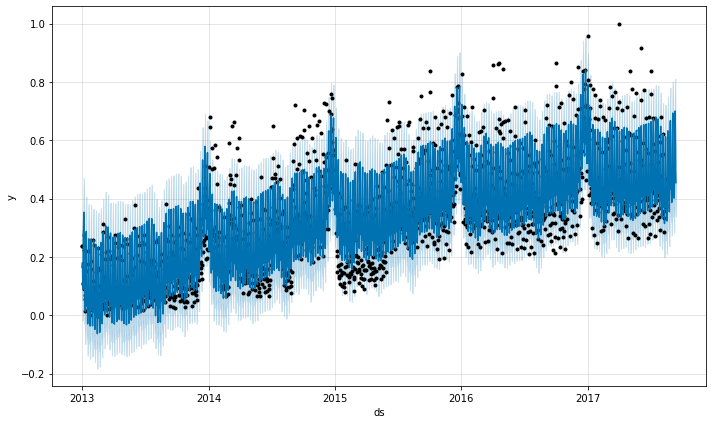

In [ ]:
fig1 = model_Prophet.plot(forecast)

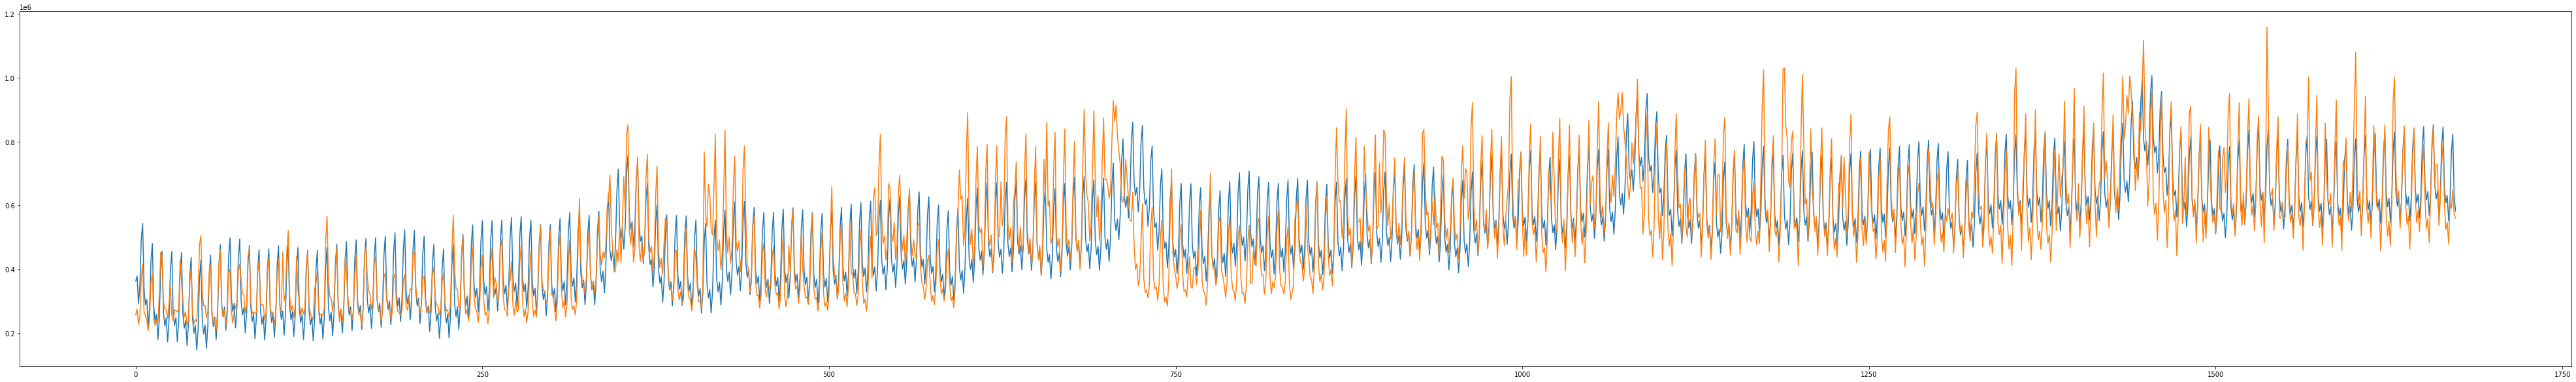

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(70, 10))
plt.plot(train_results_prophet['Train Predictions'])
plt.plot(train_results_prophet['Actuals'])

# **RESUMEN**

**Evaluación de Modelos**


Al desarrollar modelos de aprendizaje automático, generalmente comparamos varios modelos durante la fase de construcción. Luego, estimamos los rendimientos de esos modelos y se seleccionamos el modelo que considera que tiene mayor probabilidades de funcionar bien. Necesitamos medidas objetivas de desempeño para poder decidir qué pronóstico conservar como su pronóstico real. A lo largo de este cuaderno, vamos a usar numerosas herramientas para la evaluación de modelos. Veremos diferentes estrategias para evaluar modelos de aprendizaje automático en general y adaptaciones y consideraciones específicas a tener en cuenta para la previsión. También verá diferentes métricas para calificar el rendimiento del modelo.

**Métrica 1: MSE**
El error cuadrático medio (MSE) es una de las métricas más utilizadas en el aprendizaje automático. Se calcula como el promedio de los errores al cuadrado. Para calcular el MSE, toma los errores por fila de datos, eleva al cuadrado esos errores y luego toma el promedio de ellos.

$$MSE=\frac{1}{n}\sum(y_i-\hat y_i)^2 $$

La métrica de error MSE es excelente para comparar diferentes modelos en el mismo conjunto de datos. La escala del MSE será la misma para cada modelo aplicado al mismo conjunto de datos. Sin embargo, la escala de la métrica no es muy intuitiva, lo que dificulta su interpretación fuera de la evaluación comparativa de múltiples modelos.



**Métrica 2: RMSE**
El RMSE, o raíz del error cuadrático medio, es la raíz cuadrada del error cuadrático medio. Como puede comprender, sacar la raíz cuadrada del MSE no hace ninguna diferencia cuando desea utilizar las métricas de error para clasificar los rendimientos en orden.

$$RSME=\sqrt{MSE} $$


Sin embargo, hay una ventaja en usar el RMSE en lugar del MSE. La razón para sacar la raíz cuadrada del MSE es que la escala del RMSE es la misma que la escala de la variable original. En la fórmula MSE, se toma el promedio de los errores al cuadrado. Esto hace que el valor sea difícil de interpretar. El uso de la raíz cuadrada hará que la escala de la métrica de error vuelva a la escala de sus valores reales.



**Métrica 3: MAE**
El error absoluto medio (MAE) se calcula tomando las diferencias absolutas entre los valores pronosticados y reales por fila. El promedio de esos errores absolutos es el error absoluto medio.

 $$MAE=\frac{1}{n} \sum|y_i-\hat y_i| $$

El MAE toma los valores absolutos de los errores antes de promediarlos. Tomar el promedio de los errores absolutos es una forma de asegurarse de que la suma de los errores no haga que se cancelen entre sí.

Has visto que el MSE usa el cuadrado de los errores para evitar esto, y el MAE es una alternativa a esto. El MAE tiene una fórmula más intuitiva: es la métrica de error que la mayoría de la gente encuentra intuitivamente. Sin embargo, el RMSE es generalmente favorecido sobre el MAE.



**Métrica 4: MAPE**
El MAPE, abreviatura de Error porcentual absoluto medio, se calcula tomando el error de cada predicción, dividido por el valor real. Esto se hace para obtener los errores relativos a los valores reales. Esto hará que la medida del error sea un porcentaje y, por lo tanto, está estandarizado.

Como hemos entendido de las medidas de error anteriores, no se estandarizaron en una escala entre cero y uno. Sin embargo, esta estandarización es muy útil. Esto facilita la comunicación de los resultados de rendimiento.

Para calcular el MAPE, toma los valores absolutos de esos porcentajes por fila y calcula su promedio.

 $$MAPE=\frac{1}{n}\sum|\frac{y_i-\hat y_i}{y_i}| $$
 
El MAPE mide un porcentaje de error. Es una medida de error, por lo que los valores más bajos para el MAPE son mejores. Sin embargo, puede convertir fácilmente el MAPE en una medida de bondad de ajuste calculando 1 – MAPE. En muchos casos, es más fácil comunicar el desempeño en términos de un resultado positivo que negativo.



**Métrica 5: R2**
La métrica R2 (R cuadrado) es una métrica que está muy cerca de la métrica 1 - MAPE. Es una métrica de rendimiento en lugar de una métrica de error, lo que la hace ideal para estimar el rendimiento de nuestro modelo.

El R2 es un valor que tiende a estar entre 0 y 1, siendo 0 malo y 1 perfecto. Por lo tanto, se puede usar fácilmente como un porcentaje multiplicándolo por 100. El único caso en el que el R2 puede ser negativo es si su pronóstico es más del 100 % incorrecto.

$$R^2=1-\frac{\sum(y_i -\hat y_i)^2 }{\sum (y_i -\bar y_i )^2} $$
 
La fórmula hace un cálculo interesante. Calcula una relación entre la suma de los errores al cuadrado y la suma de las desviaciones entre el pronóstico y el promedio. Esto se reduce a un porcentaje de aumento de su modelo sobre el uso del promedio como modelo. Si su modelo es una predicción tan mala como usar el promedio, entonces el R2 será cero. Como el promedio se usa a menudo como modelo de referencia, esta es una métrica de rendimiento muy práctica.

In [91]:
#Concatenado de predicciones y valores reales
predicciones= test_results_sarima
predicciones['Test Predictions SARIMA 2']= test_results_sarima2['Test Predictions SARIMA 2']
predicciones.head(3)

Test Predictions SARIMA        Actuals  Test Predictions SARIMA 2
0            600814.457275  621346.094939              573005.209504
1            561058.595714  545708.006931              498531.350775
2            610104.191700  583188.254136              529215.388475

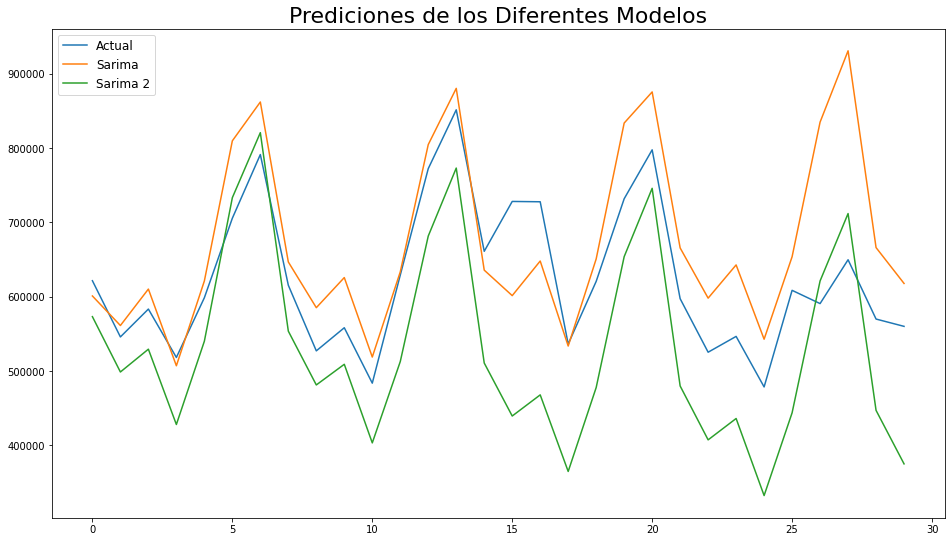

In [103]:
import plotly.express as px

plt.figure(figsize=(16,9))
plt.plot(predicciones.index, predicciones["Actuals"], label="Actual")
plt.plot(predicciones.index, predicciones["Test Predictions SARIMA"], label="Sarima")
plt.plot(predicciones.index, predicciones["Test Predictions SARIMA 2"],label="Sarima 2")
plt.legend(fontsize=12)
plt.title("Prediciones de los Diferentes Modelos", fontsize=22)
plt.show()

In [80]:
#Función para evaluar
def evaluacion_metrica(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [107]:
#Evaluación SARIMAX
evaluacion_metrica(predicciones['Actuals'], predicciones['Test Predictions SARIMA'])

Evaluation metric results:-
MSE is : 8232253136.529708
MAE is : 66644.75642943401
RMSE is : 90731.76476036222
MAPE is : 10.697841633068306
R2 is : 0.11960880396352158



In [106]:
#Evaluación SARIMAX mejorado con AUTOARIMA
evaluacion_metrica(predicciones['Actuals'], predicciones['Test Predictions SARIMA 2'])

Evaluation metric results:-
MSE is : 14598753186.579868
MAE is : 102606.49748147845
RMSE is : 120825.30027514878
MAPE is : 16.79099704285446
R2 is : -0.5612510409261295

